<center>
<table>
  <tr>
    <td><img src="https://portal.nccs.nasa.gov/datashare/astg/training/python/logos/nasa-logo.svg" width="100"/> </td>
     <td><img src="https://portal.nccs.nasa.gov/datashare/astg/training/python/logos/ASTG_logo.png?raw=true" width="80"/> </td>
     <td> <img src="https://www.nccs.nasa.gov/sites/default/files/NCCS_Logo_0.png" width="130"/> </td>
    </tr>
</table>
</center>

        
<center>
<h1><font color= "blue" size="+3">ASTG Python Courses</font></h1>
</center>

---

<center><h1><font color="red" size="+3">Introduction to Pandas</font></h1></center>

# <font color="red">Objectives</font>
In this presentation, we will cover the following topics:
1. Pandas data structures (Series and DataFrames)
2. Inspecting data in DataFrames
3. Important functions
     - `grouby()`
     - `apply`
     - `concat()`, `join()`, `merge()`
     - `compare()`
4. Reading remote CSV files and tables.
5. Cleaning and formatting data
6. Manipulating time series data
7. Performing statistical calculations
8. Visualizing the data

# <font color="red">Useful References</font>
- <a href="https://bitbucket.org/hrojas/learn-pandas/src/master/">Learn Pandas</a> (by Hernan Rojas)
- <a href="https://www.learndatasci.com/tutorials/python-pandas-tutorial-complete-introduction-for-beginners/"> Python Pandas Tutorial: A Complete Introduction for Beginners</a>
- <a href="https://www.python-course.eu/pandas.php">Introduction into Pandas</a>
- <a href="http://earthpy.org/pandas-basics.html">Time series analysis with pandas</a>
- <a href="https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html">Working with Time Series</a>
- [Introduction to data analysis](https://pythongis.org/part1/chapter-03/index.html)

![fig_logo](https://miro.medium.com/max/3200/1*9v51-jsfHtk6fgAIYLoiHQ.jpeg)
Image Source: pandas.pydata.org

# <font color="red">What is Pandas?</font>
+ `Pandas` is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.
+ Some key features:
    - Fast and efficient DataFrame object with default and customized indexing.
    - Tools for loading data into in-memory data objects from different file formats.
    - Data alignment and integrated handling of missing data.
    - Reshaping and pivoting of data sets.
    - Label-based slicing, indexing and subsetting of large data sets.
    - Columns from a data structure can be deleted or inserted.
    - Group by data for aggregation and transformations.
    - High performance merging and joining of data.
    - Time Series functionality.
+ Able to manipulate several <a href="https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html">types of files</a>, including CSVs, TSVs , JSONs, HTML, xlsx, HDF5, Python Pickle, among others.
* Is compatible with many of the other data analysis libraries, like Scikit-Learn, Matplotlib, NumPy, and more. 

Some of key features of `Pandas` are captured in the diagram below:

![fig_features](https://favtutor.com/resources/images/uploads/mceu_16841658121636696850726.png)
Image Source: [favtutor.com](https://favtutor.com/blogs/numpy-vs-pandas)

# <font color="red">Packages Used</font>

We will use the followin packages:

- `Matplolib`: for visualization
- `Seaborn`: for visualization settings
- `NumPy`: for array creation.
- `Pandas`: for creating and manipulating Series and DataFrames, and for visualization.

In addition, we will use the `datetime` module to manipulate dates and times.

In [19]:
import warnings
warnings.filterwarnings("ignore")

In [74]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
print(f'Using Numpy version:  {np.__version__}')
print(f'Using Pandas version: {pd.__version__}')

Using Numpy version:  1.26.4
Using Pandas version: 2.2.1


#### Notebook settings

In [10]:
%matplotlib inline

# Only 5 rows of data will be displayed
#pd.set_option("max_rows", 5) 

# Print floating point numbers using fixed point notation
np.set_printoptions(suppress=True)

# Set figure size
LARGE_FIGSIZE = (8, 6)

#### Graphics

In [11]:
#from seaborn import set_style
#set_style("darkgrid")
import seaborn as sns
sns.set(style='ticks', context='talk')
import matplotlib.pyplot as plt

# <font color="red">`pandas` Data Structures

There are three data structures provided by the Pandas, which are as follows:

- **Series**: 1D size-immutable array like structure having homogeneous data.
- **DataFrames**: 2D size-mutable tabular structure with heterogeneously typed columns.
- **Panel**: 3D, size-mutable array (not covered here).

## <font color="blue">1D Data Structures: Series</font>

- A <font color='red'>Series</font>  is a one-dimensional <font color='green'>**labeled**</font> array capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.). 
- The row labels of Series are called the **index**. 
- Think of a Series as a cross between a list and a dict.

![title](https://portal.nccs.nasa.gov/datashare/astg/training/python/pandas/pandas_series.png)

#### Creating a Series

A Series can be constructed with the `pd.Series` constructor (passing a list, array, dictionary or existing DataFrame).

```python
pd.Series(data=None, index=None, dtype=None, 
          name=None, copy=False)
```

- **data**: Array or dict or scalar value or iterables. It is used to populate the rows of the Series object.
- **index**: Array or index. It is used to label the rows of the Series. It’s length must be the same as the object passed in the data parameter and all the values must be unique. `np.arrange(n)` is the default index.
- **dtype**: Used to specify the data type of the Series which will be formed. If this parameter is not specified then the data type will be inferred from the values present in the series.
- **copy**: Boolean used to copy the input data. 

Creation from a list:

In [12]:
my_list = [5, 8, 13, 0.1, -5]

Use a list to create a Numpy array:

In [13]:
a = np.array(my_list)
print(type(a))
print(a)

<class 'numpy.ndarray'>
[ 5.   8.  13.   0.1 -5. ]


Use a list to create a Pandas Series:

In [14]:
sr = pd.Series(my_list)
print(type(sr))
print(sr)

<class 'pandas.core.series.Series'>
0     5.0
1     8.0
2    13.0
3     0.1
4    -5.0
dtype: float64


...get default index values

#### NumPy arrays as backend of Pandas

Contains an array of data:

In [15]:
sr.values  

array([ 5. ,  8. , 13. ,  0.1, -5. ])

In [16]:
type(sr.values) #Your pandas objects are labeled numpy arrays

numpy.ndarray

- If nothing else is specified, the values are labeled with their index number. 
- The Pandas Series will then have an associated array of data labels from `0`, to `N-1`:

In [17]:
sr.index

RangeIndex(start=0, stop=5, step=1)

In [18]:
my_rows = list(range(5))
print(my_rows)

[0, 1, 2, 3, 4]


In [19]:
sr.index.values 

array([0, 1, 2, 3, 4])

Obtain statistical information:

In [20]:
sr.describe()

count     5.00000
mean      4.22000
std       6.96362
min      -5.00000
25%       0.10000
50%       5.00000
75%       8.00000
max      13.00000
dtype: float64

#### More on the index

Rename the index values:

In [23]:
sr.index = ['A','B','C','D','E']
print(sr)

A     5.0
B     8.0
C    13.0
D     0.1
E    -5.0
dtype: float64


Or pass the index values during Pandas series creation:

In [24]:
#faster way to label rows when creating the pandas series
sr1 = pd.Series(my_list, index=['A','B','C','D','E'])
print(sr1)

A     5.0
B     8.0
C    13.0
D     0.1
E    -5.0
dtype: float64


#### Numpy Array has an implicitly defined integer index used to access the values while the Pandas Series has an explicitly defined index associated with the values.

Get value at position `n` in series

In [25]:
print(sr[3])  

0.1


Use `iloc` (integer location) to get value at position `n`

In [26]:
print(sr.iloc[3]) 

0.1


Value at given index using dictionary-like syntax

In [28]:
#searching item by label as index
print(sr.loc['D'])

0.1


We can also create a Pandas Series from a dictionary:

In [29]:
sr2 = pd.Series(dict(A=5, B=8, C=13, D=0.1, E=-5))
sr2

A     5.0
B     8.0
C    13.0
D     0.1
E    -5.0
dtype: float64

You can also, create a Pandas Series from a scalar data. But, if you pass a single value with multiple indexes, the value will be same for all the indexes.

In [30]:
sr3 = pd.Series(10.5, index=['A','B','C','D','E'])
print(sr3)

A    10.5
B    10.5
C    10.5
D    10.5
E    10.5
dtype: float64


### <font color='green'>Breakout 1</font>

1. Create a Series using:

```python
   data = {'Course': "Pandas", 'Setting': "Virtual", 'Duration': "3 hours"}
```

2. Create a new Series with the above `data` and with the index as:

```python
   my_index = ['Course_Name', 'Course_Setting', 'Course_Duration']
```

In [36]:
#keys: pandas, virtual, 3 hours
#values: course, setting, duration
data = {'Course': "Pandas", 'Setting': "Virtual", 'Duration': "3 hours"}
pd.Series(data)

Course       Pandas
Setting     Virtual
Duration    3 hours
dtype: object

In [37]:
 my_index = ['Course_Name', 'Course_Setting', 'Course_Duration']

In [39]:
series1.index = my_index
print(series1)

Course_Name         Pandas
Course_Setting     Virtual
Course_Duration    3 hours
dtype: object


<details><summary><b><font color="green">Click here to access the solution</font></b></summary>
<p>

```python
   data = {'Course': "Pandas", 'Setting': "Virtual", 'Duration': "3 hours"}
   sr1 = pd.Series(data)
   my_index = ['Course_Name', 'Course_Setting', 'Course_Duration']
   sr2 = pd.Series(data, index=my_index)
``` 
</p>
</details>

## <font color="blue">2D data structures</font>

Pandas: <font color='red'>DataFrame</font> is a 2-dimensional labeled data structure with columns of potentially different types. It is generally the most commonly used pandas object.

A <font color='red'>DataFrame</font> is like a sequence of aligned <font color='red'>Series</font> objects, i.e. they share the same index.

![title](https://portal.nccs.nasa.gov/datashare/astg/training/python/pandas/pandas_df.png)


#### Features of DataFrames

A DataFrame:
- Can be thought of as a generalization of a two-dimensional NumPy array, where both the rows and columns have a generalized index for accessing the data.
- Rows and columns of a DataFrame are labelled and can be named.
- It size is mutable.
- Supports Hetrogenous Collections of data.
- Can perform arithmetic operations on rows and columns.
- Supports reading flat files like `CSV`, `Excel`, `JSON` and also reading `SQL` tables
- Handles missing data.

#### Example of DataFrame Creation

In [40]:
df = pd.DataFrame(data=[[5, True, 'x', 2.7],
                        [8, True, 'y', 3.1],
                        [13,False,'z', np.NaN],
                        [1, False, 'a', 0.1],
                        [-5, True, 'b', -2]],
                  index=['A','B','C','D','E'],  #index is how you label the rows
                  columns=['num', 'bool', 'str', 'real'])
print(type(df))
df

<class 'pandas.core.frame.DataFrame'>


,num,bool,str,real
A,5,True,x,2.7
B,8,True,y,3.1
C,13,False,z,NaN
D,1,False,a,0.1
E,-5,True,b,-2.0


In [41]:
#NOTE: all columns have the same data type

#### Inspecting data in DataFrame

Display the first few rows:

In [42]:
df.head()

,num,bool,str,real
A,5,True,x,2.7
B,8,True,y,3.1
C,13,False,z,NaN
D,1,False,a,0.1
E,-5,True,b,-2.0


In [43]:
df.head(2)

,num,bool,str,real
A,5,True,x,2.7
B,8,True,y,3.1


Display the last few rows:

In [44]:
df.tail()

,num,bool,str,real
A,5,True,x,2.7
B,8,True,y,3.1
C,13,False,z,NaN
D,1,False,a,0.1
E,-5,True,b,-2.0


In [45]:
df.tail(3)

,num,bool,str,real
C,13,False,z,NaN
D,1,False,a,0.1
E,-5,True,b,-2.0


Get the number of rows and columns as a tuple:

In [47]:
df.shape #rows, colums

(5, 4)

Get the type of each column:

In [49]:
df.dtypes #types of each column

num       int64
bool       bool
str      object
real    float64
dtype: object

Get list of column names:

In [50]:
df.columns

Index(['num', 'bool', 'str', 'real'], dtype='object')

Get the index values:

In [51]:
df.index

Index(['A', 'B', 'C', 'D', 'E'], dtype='object')

#### Obtain basic data information

We can get the column count, number of values in each column, data type of each column, etc.:

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, A to E
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   num     5 non-null      int64  
 1   bool    5 non-null      bool   
 2   str     5 non-null      object 
 3   real    4 non-null      float64
dtypes: bool(1), float64(1), int64(1), object(1)
memory usage: 165.0+ bytes


#### Obtain descriptive statistics of each numeric column:

In [53]:
df.describe()

,num,real
count,5.000000,4.000000
mean,4.400000,0.975000
std,6.841053,2.387991
min,-5.000000,-2.000000
25%,1.000000,-0.425000
50%,5.000000,1.400000
75%,8.000000,2.800000
max,13.000000,3.100000


We can pass the argument `include='object'` to return the descriptive statistics of categorical (object) columns:

In [54]:
df.describe(include='object')

,str
count,5
unique,5
top,x
freq,1


#### Sorting records

We can sort records by any column using `df.sort_values()` function. For example, we can sort the "str" column in ascending order.

In [55]:
df.sort_values('str', ascending=True)

,num,bool,str,real
D,1,False,a,0.1
E,-5,True,b,-2.0
A,5,True,x,2.7
B,8,True,y,3.1
C,13,False,z,NaN


#### Slicing data

Get specific column(s):

In [57]:
df['num'] #This object is a pandas series, so we can maniuplate accordingly

A     5
B     8
C    13
D     1
E    -5
Name: num, dtype: int64

In [58]:
df.num

A     5
B     8
C    13
D     1
E    -5
Name: num, dtype: int64

In [60]:
df[['num','real']] #Can identify whatever specific columns you want

,num,real
A,5,2.7
B,8,3.1
C,13,NaN
D,1,0.1
E,-5,-2.0


#### Label-based selection

Get specific row(s) by name(s):

In [61]:
df.loc['C']

num        13
bool    False
str         z
real      NaN
Name: C, dtype: object

In [62]:
df.loc[['B', 'D']]

,num,bool,str,real
B,8,True,y,3.1
D,1,False,a,0.1


In [63]:
df.loc['A':'E':2]

,num,bool,str,real
A,5,True,x,2.7
C,13,False,z,NaN
E,-5,True,b,-2.0


Get specific row(s) and column(s) by name(s):

In [64]:
df.loc['A':'D':2, ['num', 'real']]

,num,real
A,5,2.7
C,13,NaN


In [65]:
df.loc['A':'C', 'num':'real']

,num,bool,str,real
A,5,True,x,2.7
B,8,True,y,3.1
C,13,False,z,NaN


#### Index-based selection

Get specific row(s) by position(s):

In [66]:
df.iloc[2]

num        13
bool    False
str         z
real      NaN
Name: C, dtype: object

In [67]:
df.iloc[1:4]

,num,bool,str,real
B,8,True,y,3.1
C,13,False,z,NaN
D,1,False,a,0.1


Get specific row(s) and column(s) by position(s):

In [68]:
df.iloc[[2,4], [1,3]]

,bool,real
C,False,NaN
E,True,-2.0


Display one random row:

In [69]:
df.sample()

,num,bool,str,real
A,5,True,x,2.7


Select columns based on datatype:

In [70]:
df.select_dtypes(include='object')

,str
A,x
B,y
C,z
D,a
E,b


#### Filtering data

Apply masking:

In [71]:
df[df.real > 1.0] #can filter values in a column greater than one

,num,bool,str,real
A,5,True,x,2.7
B,8,True,y,3.1


In [72]:
df[df.real == 3.1]

,num,bool,str,real
B,8,True,y,3.1


Problem with `NaN`:
- In Python (and NumPy), the `nan`'s don’t compare to equal. 
- Pandas/NumPy uses the fact that `np.nan != np.nan`, and treats `None` like `np.nan`.
- A scalar equality comparison versus a `None/np.nan` doesn’t provide useful information.

In [73]:
df.real

A    2.7
B    3.1
C    NaN
D    0.1
E   -2.0
Name: real, dtype: float64

In [75]:
df.real == np.NaN #cannot use normal numpy or python to observe what is nan

A    False
B    False
C    False
D    False
E    False
Name: real, dtype: bool

We can use the `isnull` method to find out which dataframe entries are '`NaN`.

In [77]:
df.isnull() #This provides true for any value that is NaN

,num,bool,str,real
A,False,False,False,False
B,False,False,False,False
C,False,False,False,True
D,False,False,False,False
E,False,False,False,False


In [80]:
df.isnull().values.any()  #true means that yes there is a nan somewhere

True

In [81]:
df.isnull().sum() #This shows the sum of 'nan's per column

num     0
bool    0
str     0
real    1
dtype: int64

#### Create a DataFrame from a 2D Numpy array

Given a two-dimensional array of data, we can create a dataframe with any specified column and index names. If left out, an integer index will be used for each.

In [82]:
my_nparray = np.random.rand(3, 2)
print("Numpy array: ", my_nparray)

Numpy array:  [[0.27138251 0.34495742]
 [0.72070785 0.27741768]
 [0.760359   0.67371658]]


Create a Pandas dataframe using a Numpy array

In [83]:
pddf = pd.DataFrame(my_nparray,
                    columns=['foo', 'bar'],
                    index=['a', 'b', 'c'])
pddf

,foo,bar
a,0.271383,0.344957
b,0.720708,0.277418
c,0.760359,0.673717


We can create a NumPy array from a Pandas DataFrame:

In [84]:
my_nparray2 = pddf.to_numpy()
print(f"Numpy array: {my_nparray2}")

Numpy array: [[0.27138251 0.34495742]
 [0.72070785 0.27741768]
 [0.760359   0.67371658]]


Create a Pandas dataframe using Pandas series

In [86]:
pdsr1 = pd.Series(np.random.rand(3)) #pandas series with two random numbers
print("First_Series: \n", pdsr1)

First_Series: 
 0    0.505747
1    0.771434
2    0.842515
dtype: float64


In [87]:
pdsr2 = pd.Series(np.random.rand(3)) #another series with two random nnumbers
print("Second_Series: \n", pdsr2)

Second_Series: 
 0    0.604348
1    0.983672
2    0.115947
dtype: float64


In [88]:
df1 = pd.DataFrame(dict(First_Series = pdsr1, Second_Series = pdsr2))
print(df1)

   First_Series  Second_Series
0      0.505747       0.604348
1      0.771434       0.983672
2      0.842515       0.115947


We can also use the `concat` function:

In [89]:
df2 = pd.concat([pdsr2, pdsr2], axis=1)
df2.columns = ['First_Series', 'Second_Series']
print(df2)

   First_Series  Second_Series
0      0.604348       0.604348
1      0.983672       0.983672
2      0.115947       0.115947


### <font color='green'>Breakout 2</font>
In the above Pandas dataframe, relabel the index as `['Row0', 'Row1', 'Row2']`.

<p>
<p>
    
<details><summary><b><font color="green">Click here to access the solution</font></b></summary>
<p>

```python
df1.index = ['Row0', 'Row1', 'Row2']
``` 
</p>
</details>

In [92]:
df2.index = ['Row1', 'Row2', 'Row3']
print(df2)
df2

      First_Series  Second_Series
Row1      0.604348       0.604348
Row2      0.983672       0.983672
Row3      0.115947       0.115947


,First_Series,Second_Series
Row1,0.604348,0.604348
Row2,0.983672,0.983672
Row3,0.115947,0.115947


### <font color='green'>Breakout 3</font>
The code below creates a Pandas DataFrame of students' grades.

```python
columns = ["Students", "Engl", "Phys", "Math", "Comp"]
students = ["Julia", "Jules", "Julio"]
engl_grades = ["A", "D", "B"]
phys_grades = ["A", "A", "C"]
math_grades = ["C", "A", "A"]
comp_grades = ["B", "B", "C"]

zipped = list(zip(students, engl_grades, phys_grades, 
                  math_grades, comp_grades))
student_df = pd.DataFrame(zipped, columns = columns)
```

Do the following:
- Set the `Students` as index.
- Replace the letters (`A`, `B`, `C`, `D`) with numbers (`4`, `3`, `2`, `1`)
- Compute the GPA of each student.

<p>
<p>
    
<details><summary><b><font color="green">Click here to access the solution</font></b></summary>
<p>

```python
# Question 1
student_df = student_df.set_index(columns[0])
    
# Question 2
mymap = {'A': 4, 'B': 3, 'C': 2, 'D': 1}
new_student_df = student_df.applymap(lambda s: mymap.get(s) if s in mymap else s)
    
# Question 3
new_student_df.mean(axis=1)
``` 
</p>
</details>

**A pandas dataframe can be seen as a collection of pandas series**
![fig_objects](https://doit-test.readthedocs.io/en/latest/_images/base_01_pandas_5_0.png)
Image Source: doit-test.readthedocs.io

### BOVE: pandas dataframes are a collection of labeled numpy arrays by columns

### <font color="orange">Important Operations on DataFrames</font>

- `apply()`
- Merging
   - `concat()` 
   - `join()` 
   - `merge()`
- Comparing
   - `compare()`
- Grouping
   - `groupby()`

#### `apply()` Function

- Allows us to use an external function to manipulate very row or column.
- The function can be any Python function that takes a single argument and returns a single value.
- Can be used to perform a wide range of operations on your data, including filtering, sorting, and grouping.
- You used the `axis` parameter to determine if you want to apply to a row (`axis=1`) or a column (`axis=0`).

```python
DataFrame.apply(func, axis=0, broadcast=None, raw=False, 
                reduce=None, result_type=None, args=(), **kwds)
```

In [93]:
data = [(-13,5,7), (2,4,-6),(7.5,-5,8),(-2,3,9)]
df = pd.DataFrame(data, 
                  columns = ['col1', 'col2', 'col3'],
                 index=['row1', 'row2', 'row3', 'row4'])
print(df)

      col1  col2  col3
row1 -13.0     5     7
row2   2.0     4    -6
row3   7.5    -5     8
row4  -2.0     3     9


Apply to all entries:

In [94]:
#say you want to square all of the numbers in your dataframe, first define the square function
def square_func(x):
    return x**2

In [95]:
df1 = df.apply(square_func)
df1

,col1,col2,col3
row1,169.00,25,49
row2,4.00,16,36
row3,56.25,25,64
row4,4.00,9,81


In [97]:
#Keyword lambda can take any function if you just want to use it once in a command
df2 = df.apply(lambda x: x**2)
df2

,col1,col2,col3
row1,169.00,25,49
row2,4.00,16,36
row3,56.25,25,64
row4,4.00,9,81


In [99]:
#You can apply a function/manipulation to just a single column if you want
df['col3'].apply(lambda x: x**2)

row1    49
row2    36
row3    64
row4    81
Name: col3, dtype: int64

Calculation along axis:

In [101]:
#This sums all values in each column
df3 = df.apply(sum, axis=0)
df3

col1    -5.5
col2     7.0
col3    18.0
dtype: float64

In [102]:
df4 = df.apply(sum, axis=1)
df4

row1    -1.0
row2     0.0
row3    10.5
row4    10.0
dtype: float64

In [104]:
#Using multiple arguments

In [105]:
def my_func(x, y, z):
    return (x+y**2)/z

In [109]:
#making a new column that is some manipulation of existing columns
df['col5'] = df.apply(lambda x: my_func(x['col1'], x['col2'], x['col3']), axis=1)
df

,col1,col2,col3,col5
row1,-13.0,5,7,1.714286
row2,2.0,4,-6,-3.000000
row3,7.5,-5,8,4.062500
row4,-2.0,3,9,0.777778


In [110]:
#A function can take multiple columns as inputs, in this case, my_func(x) where x is the dataframe with respective column
df5 = df.apply(lambda x: my_func(x['col1'], x['col2'], x['col3']), axis=1)
df5

row1    1.714286
row2   -3.000000
row3    4.062500
row4    0.777778
dtype: float64

#### Merging

In [111]:
columns = ["Engl", "Phys", "Math", "Comp"]
students = ["Julia", "Jules", "Julio"]
engl_grades = ["A", "D", "B"]
phys_grades = ["A", "A", "C"]
math_grades = ["C", "A", "A"]
comp_grades = ["B", "B", "C"]

zipped = list(zip(engl_grades, phys_grades, 
                  math_grades, comp_grades))
student_grades = pd.DataFrame(zipped, columns = columns, index=students)
student_grades

,Engl,Phys,Math,Comp
Julia,A,A,C,B
Jules,D,A,A,B
Julio,B,C,A,C


In [112]:
new_student = ['Jean']
new_student_grade = pd.DataFrame([['C', 'A', 'B', 'A']], 
                                 columns = columns, 
                                 index=new_student)
new_student_grade

,Engl,Phys,Math,Comp
Jean,C,A,B,A


In [117]:
#Lets try to merge these two rows above using concat

In [118]:
new_courses = ['Psy', 'Bio']
new_course_grades = pd.DataFrame([['C', 'A'], ['A', 'B'], ['A','A'], ['B', 'C']], 
                                 columns = new_courses, 
                                 index=students+new_student)
new_course_grades

,Psy,Bio
Julia,C,A
Jules,A,B
Julio,A,A
Jean,B,C


#and try to merge the columns using join

`concat` function:

- Append either columns or rows from one DataFrame to another.

In [119]:
student_grades2 = pd.concat([student_grades, new_student_grade])
student_grades2

,Engl,Phys,Math,Comp
Julia,A,A,C,B
Jules,D,A,A,B
Julio,B,C,A,C
Jean,C,A,B,A


`join()` function:

- Used to combine two DataFrame on row indices.

In [120]:
student_grades3 = student_grades2.join(new_course_grades)
student_grades3

,Engl,Phys,Math,Comp,Psy,Bio
Julia,A,A,C,B,C,A
Jules,D,A,A,B,A,B
Julio,B,C,A,C,A,A
Jean,C,A,B,A,B,C


`merge` function:

Combines or joins two DataFrames with the same columns or indices.

```python
merge(left, right, how='inner', on=None, left_on=None, right_on=None,
      left_index=False, right_index=False, sort=True,
      suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)
```

- The column to be keyed: `on`, `left_on`, `right_on`
- The merging method: `how`
   - INNER JOIN: `how='inner'`
   - LEFT JOIN: `how='left'`
   - RIGHT JOIN: `how='right'`
   - OUTER JOIN: `how='outer'`
   - CROSS JOIN: `how='cross'`


![fig_merge](https://datacomy.com/data_analysis/pandas/merge/types-of-joins.png)

![fig_inner](https://i.stack.imgur.com/3qpXx.gif)
![fig_full](https://i.stack.imgur.com/dG8mw.gif)
![fig_right](https://i.stack.imgur.com/JpPRH.gif)
![fig_left](https://i.stack.imgur.com/s5hgJ.gif)

In [121]:
grade_df1 = pd.DataFrame([['Jules',100,85,90], ['Julio',89,97,85], ['Julia',91,75,95]], 
                         columns=['Student', 'Math', 'Eng', 'Phys'])
grade_df1

,Student,Math,Eng,Phys
0,Jules,100,85,90
1,Julio,89,97,85
2,Julia,91,75,95


In [122]:
grade_df2 = pd.DataFrame([['Jules',100,92,93], ['Julio',93,94,87], ['Julia',93,82,95]], 
                         columns=['Student', 'Math', 'Eng', 'Phys'])
grade_df2

,Student,Math,Eng,Phys
0,Jules,100,92,93
1,Julio,93,94,87
2,Julia,93,82,95


In [123]:
grade_df1.merge(grade_df2, on='Student')

,Student,Math_x,Eng_x,Phys_x,Math_y,Eng_y,Phys_y
0,Jules,100,85,90,100,92,93
1,Julio,89,97,85,93,94,87
2,Julia,91,75,95,93,82,95


In [124]:
grade_df1.merge(grade_df2, on='Math')

,Student_x,Math,Eng_x,Phys_x,Student_y,Eng_y,Phys_y
0,Jules,100,85,90,Jules,92,93


In [125]:
grade_df1.merge(grade_df2, how='right')

,Student,Math,Eng,Phys
0,Jules,100,92,93
1,Julio,93,94,87
2,Julia,93,82,95


In [126]:
grade_df1.merge(grade_df2, how='inner')

,Student,Math,Eng,Phys


This creates all possible combinations of `left` and `right`. 

In [ ]:
grade_df1.merge(grade_df2, how='cross')

#### `compare()` function

- Compares two DataFrames row-by-row and column-by-column.
- Displays the differences next to each other.

```python
df1.compare(df2, align_axis=1, keep_shape=False, keep_equal=False)
```

In [ ]:
print(grade_df1.compare(grade_df2))

Add the argument `keep_equal=True` if you want to keep the cirresponding values that are equal.

In [ ]:
print(grade_df1.compare(grade_df2, keep_equal=True))

In [ ]:
print(grade_df1.compare(grade_df2, align_axis=1))

When `align_axis=0` the `DataFrame.compare()` method returns DataFrame that are stacked vertically with rows drawn alternately from self and others.

In [ ]:
print(grade_df1.compare(grade_df2, align_axis=0))

If `keep_shape=True`, all rows and columns in the resulted DataFrame will be shown. Otherwise, only the ones with different values will be shown in the resulted DataFrame.

In [ ]:
print(grade_df1.compare(grade_df2, keep_shape=True))

#### `groupby()` Function

Will be covered in a furure section.

# <font color='red'>Pandas DateTime</font>
- Being able to handle and work with temporal information is extremely important when doing data analysis. 
- Time information in the data allows us to see patterns through time (trends) as well as to make predictions into the future (at varying level of confidence). 
- Many data points we collect are obtained at different time intervals and ordered chronologically. They are referred as time series data.
- The [datetime](https://docs.python.org/3/library/datetime.html) provides functionalities for manipulating dates and times.
- Pandas provides a number to tools to handle times series data by including methods for manipulation `datetime` objects.

Generate sequences of fixed-frequency dates and time spans:

In [127]:
#takes in a date as a string
dti = pd.date_range('2022-06-01', periods=15, freq='H')
print(type(dti))
dti

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


DatetimeIndex(['2022-06-01 00:00:00', '2022-06-01 01:00:00',
               '2022-06-01 02:00:00', '2022-06-01 03:00:00',
               '2022-06-01 04:00:00', '2022-06-01 05:00:00',
               '2022-06-01 06:00:00', '2022-06-01 07:00:00',
               '2022-06-01 08:00:00', '2022-06-01 09:00:00',
               '2022-06-01 10:00:00', '2022-06-01 11:00:00',
               '2022-06-01 12:00:00', '2022-06-01 13:00:00',
               '2022-06-01 14:00:00'],
              dtype='datetime64[ns]', freq='h')

Manipulating and converting date times with timezone information:

In [128]:
dti = dti.tz_localize("UTC")
dti

DatetimeIndex(['2022-06-01 00:00:00+00:00', '2022-06-01 01:00:00+00:00',
               '2022-06-01 02:00:00+00:00', '2022-06-01 03:00:00+00:00',
               '2022-06-01 04:00:00+00:00', '2022-06-01 05:00:00+00:00',
               '2022-06-01 06:00:00+00:00', '2022-06-01 07:00:00+00:00',
               '2022-06-01 08:00:00+00:00', '2022-06-01 09:00:00+00:00',
               '2022-06-01 10:00:00+00:00', '2022-06-01 11:00:00+00:00',
               '2022-06-01 12:00:00+00:00', '2022-06-01 13:00:00+00:00',
               '2022-06-01 14:00:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='h')

Use the sequence to create a Pandas series:

In [129]:
ts = pd.Series(range(len(dti)), index=dti)
print(ts)

2022-06-01 00:00:00+00:00     0
2022-06-01 01:00:00+00:00     1
2022-06-01 02:00:00+00:00     2
2022-06-01 03:00:00+00:00     3
2022-06-01 04:00:00+00:00     4
2022-06-01 05:00:00+00:00     5
2022-06-01 06:00:00+00:00     6
2022-06-01 07:00:00+00:00     7
2022-06-01 08:00:00+00:00     8
2022-06-01 09:00:00+00:00     9
2022-06-01 10:00:00+00:00    10
2022-06-01 11:00:00+00:00    11
2022-06-01 12:00:00+00:00    12
2022-06-01 13:00:00+00:00    13
2022-06-01 14:00:00+00:00    14
Freq: h, dtype: int64


Resample or convert the time series to a particular frequency:

- Sample every two hours and compute the mean

In [130]:
ts.resample('2H').mean()

2022-06-01 00:00:00+00:00     0.5
2022-06-01 02:00:00+00:00     2.5
2022-06-01 04:00:00+00:00     4.5
2022-06-01 06:00:00+00:00     6.5
2022-06-01 08:00:00+00:00     8.5
2022-06-01 10:00:00+00:00    10.5
2022-06-01 12:00:00+00:00    12.5
2022-06-01 14:00:00+00:00    14.0
Freq: 2h, dtype: float64

Create a Pandas series where the index is the time component:

In [132]:
num_periods = 67
ts = pd.Series(np.random.random(num_periods),
               index=pd.date_range('2024-01', 
                                   periods=num_periods, 
                                   freq='W'))
ts

2024-01-07    0.712919
2024-01-14    0.724359
2024-01-21    0.562962
2024-01-28    0.508466
2024-02-04    0.949185
                ...   
2025-03-16    0.796786
2025-03-23    0.391082
2025-03-30    0.839452
2025-04-06    0.510288
2025-04-13    0.015323
Freq: W-SUN, Length: 67, dtype: float64

Create a Pandas DataFrame where the index is the time component:

In [134]:
num_periods = 2500
df = pd.DataFrame(dict(X = np.random.random(num_periods), 
                       Y = -5+np.random.random(num_periods)),
                  index=pd.date_range('2024', 
                                      periods=num_periods, 
                                      freq='D'))
df

,X,Y
2024-01-01,0.472684,-4.804424
2024-01-02,0.858320,-4.448363
2024-01-03,0.425355,-4.464611
2024-01-04,0.781469,-4.566585
2024-01-05,0.382787,-4.280168
...,...,...
2030-10-31,0.983653,-4.479906
2030-11-01,0.204009,-4.825968
2030-11-02,0.506051,-4.093179
2030-11-03,0.923986,-4.373260


**Resampling**
- The `resample()` function is used to resample time-series data.
- It groups data by a certain time span. 
- You specify a method of how you would like to resample.
- Pandas comes with many in-built options for resampling, and you can even define your own methods.

Here are some time period options:

| Alias | Description |
| --- | --- |
| 'D' |	Calendar day |
| 'W' |	Weekly |
| 'M' |	Month end |
| 'Q' |	Quarter end |
| 'A' |	Year end |

Here are some method options for resampling:

| Method | Description |
| --- | --- |
| max |	Maximum value |
| mean |	Mean of values in time range |
| median |	Median of values in time range |
| min |	Minimum data value |
| sum |	Sum of values |

In [135]:
df.X.resample('Y').mean()

2024-12-31    0.490450
2025-12-31    0.519254
2026-12-31    0.476867
2027-12-31    0.505701
2028-12-31    0.493110
2029-12-31    0.517621
2030-12-31    0.501799
Freq: YE-DEC, Name: X, dtype: float64

In [136]:
df.Y.resample('W').sum()

2024-01-07   -32.478087
2024-01-14   -32.437413
2024-01-21   -31.905857
2024-01-28   -31.244751
2024-02-04   -32.443677
                ...    
2030-10-13   -31.322476
2030-10-20   -32.352887
2030-10-27   -31.704135
2030-11-03   -31.323854
2030-11-10    -4.596906
Freq: W-SUN, Name: Y, Length: 358, dtype: float64

In [137]:
df.X.resample('Q').median()

2024-03-31    0.472684
2024-06-30    0.489218
2024-09-30    0.399986
2024-12-31    0.527077
2025-03-31    0.523199
2025-06-30    0.530614
2025-09-30    0.514674
2025-12-31    0.503314
2026-03-31    0.451487
2026-06-30    0.474393
2026-09-30    0.451763
2026-12-31    0.465461
2027-03-31    0.508690
2027-06-30    0.478876
2027-09-30    0.549085
2027-12-31    0.399439
2028-03-31    0.453386
2028-06-30    0.572315
2028-09-30    0.462429
2028-12-31    0.503635
2029-03-31    0.573341
2029-06-30    0.394427
2029-09-30    0.540106
2029-12-31    0.532434
2030-03-31    0.490478
2030-06-30    0.551581
2030-09-30    0.483862
2030-12-31    0.558471
Freq: QE-DEC, Name: X, dtype: float64

# <font color="red">Applications</font>

## <font color="blue"> Report on UFO Sightings</font>

In [139]:
#This can take information from a url website, in this case we are taking a csv (comma separated values) file in
#IT has city, color, shape, date, time
url = 'http://bit.ly/uforeports'
df_ufo = pd.read_csv(url)            
df_ufo 

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00
...,...,...,...,...,...
18236,Grant Park,NaN,TRIANGLE,IL,12/31/2000 23:00
18237,Spirit Lake,NaN,DISK,IA,12/31/2000 23:00
18238,Eagle River,NaN,NaN,WI,12/31/2000 23:45
18239,Eagle River,RED,LIGHT,WI,12/31/2000 23:45


In [142]:
df_ufo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18241 entries, 0 to 18240
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   City             18215 non-null  object
 1   Colors Reported  2882 non-null   object
 2   Shape Reported   15597 non-null  object
 3   State            18241 non-null  object
 4   Time             18241 non-null  object
dtypes: object(5)
memory usage: 712.7+ KB


Convert the Time column to datetime format:

In [143]:
df_ufo['Time'] = pd.to_datetime(df_ufo.Time)
df_ufo

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00
...,...,...,...,...,...
18236,Grant Park,NaN,TRIANGLE,IL,2000-12-31 23:00:00
18237,Spirit Lake,NaN,DISK,IA,2000-12-31 23:00:00
18238,Eagle River,NaN,NaN,WI,2000-12-31 23:45:00
18239,Eagle River,RED,LIGHT,WI,2000-12-31 23:45:00


In [144]:
df_ufo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18241 entries, 0 to 18240
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   City             18215 non-null  object        
 1   Colors Reported  2882 non-null   object        
 2   Shape Reported   15597 non-null  object        
 3   State            18241 non-null  object        
 4   Time             18241 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(4)
memory usage: 712.7+ KB


Rename the column to Date:

In [145]:
#inplace means it replaces it in place without creating a new column
df_ufo.rename(columns={'Time':'Date'}, inplace=True)
df_ufo

,City,Colors Reported,Shape Reported,State,Date
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00
...,...,...,...,...,...
18236,Grant Park,NaN,TRIANGLE,IL,2000-12-31 23:00:00
18237,Spirit Lake,NaN,DISK,IA,2000-12-31 23:00:00
18238,Eagle River,NaN,NaN,WI,2000-12-31 23:45:00
18239,Eagle River,RED,LIGHT,WI,2000-12-31 23:45:00


Move the Date column as the DataFrame index:

In [151]:
#Instead of numbered rows, use dates as row indexes
df_ufo = df_ufo.set_index(['Date'])
df_ufo

KeyError: "None of ['Date'] are in the columns"

**Question 1**: How to determine the number of sightings between two dates?

In [152]:
df1 = df_ufo.loc['1978-01-01 09:00:00':'1980-01-01 11:00:00']
df1

,City,Colors Reported,Shape Reported,State
Date,,,,
1978-01-01 13:00:00,Sagle,NaN,SPHERE,ID
1978-01-05 00:00:00,Warwick,RED,SPHERE,RI
1978-01-06 01:00:00,Westport,NaN,OTHER,CA
1978-01-07 02:00:00,Bristol,NaN,NaN,TN
1978-01-09 03:30:00,Chatsworth,NaN,CIRCLE,CA
...,...,...,...,...
1979-12-29 02:00:00,Waterloo,NaN,NaN,IA
1979-12-31 22:35:00,Kansas City,BLUE,CIRCLE,MO
1979-12-31 23:00:00,Spartanburg,NaN,CIRCLE,SC


**Question 2**: How to extract the sightings at a specific month?

In [153]:
df2 = df_ufo[df_ufo.index.month == 2]
df2

,City,Colors Reported,Shape Reported,State
Date,,,,
1931-02-15 14:00:00,Holyoke,NaN,OVAL,CO
1942-02-25 00:00:00,Los Angeles,NaN,NaN,CA
1946-02-01 17:00:00,Merced,NaN,SPHERE,CA
1947-02-20 22:15:00,Syracuse,NaN,DISK,NY
1951-02-03 22:00:00,Thompsonville,NaN,DISK,CT
...,...,...,...,...
2000-02-29 13:35:00,Hawaii's Volcano National Park,NaN,SPHERE,HI
2000-02-29 20:45:00,Las Vegas,NaN,SPHERE,NM
2000-02-29 21:50:00,New Haven,NaN,LIGHT,MI


**Question 3**: How to extract the sightings at a specific year?

In [154]:
df3 = df_ufo[df_ufo.index.year == 1999]
df3

,City,Colors Reported,Shape Reported,State
Date,,,,
1999-01-01 02:30:00,Loma Rica,NaN,LIGHT,CA
1999-01-01 03:00:00,Bauxite,NaN,NaN,AR
1999-01-01 14:00:00,Florence,NaN,CYLINDER,SC
1999-01-01 15:00:00,Lake Henshaw,NaN,CIGAR,CA
1999-01-01 17:15:00,Wilmington Island,NaN,LIGHT,GA
...,...,...,...,...
1999-12-31 23:30:00,Rockford,ORANGE,LIGHT,IL
1999-12-31 23:42:00,Santee,NaN,FORMATION,CA
1999-12-31 23:47:00,Keys,NaN,OTHER,CA


**Question 4**: How to extract the sightings in a given State?

In [161]:
df4 = df_ufo[df_ufo['City']== 'New York']
df4

,City,Colors Reported,Shape Reported,State
Date,,,,
1974-06-30 18:30:00,New York,NaN,DISK,NY
1995-06-10 23:00:00,New York,BLUE,TRIANGLE,NY
1997-06-10 12:00:00,New York,NaN,OTHER,NY
1999-09-24 19:30:00,New York,NaN,LIGHT,NY
1999-11-16 18:55:00,New York,NaN,VARIOUS,NY


**Question 5**: How to get the sightings with shape `TRIANGLE`?

In [162]:
df5 = df_ufo[df_ufo['Shape Reported']== 'TRIANGLE']
df5

,City,Colors Reported,Shape Reported,State
Date,,,,
1930-06-01 22:00:00,Ithaca,NaN,TRIANGLE,NY
1947-04-15 23:00:00,San Deigo,NaN,TRIANGLE,CA
1950-05-12 14:00:00,Fort Lewis,NaN,TRIANGLE,WA
1950-10-15 15:00:00,Sandy Hook,NaN,TRIANGLE,NJ
1952-04-15 16:00:00,Greenville,ORANGE,TRIANGLE,TX
...,...,...,...,...
2000-12-27 22:10:00,Saco,NaN,TRIANGLE,ME
2000-12-29 19:30:00,Berthoud Pass,NaN,TRIANGLE,CO
2000-12-30 22:00:00,San Francisco,NaN,TRIANGLE,CA


**Question 6**: How to count the number of sightings in each state?

In [163]:
#Group by function selects a column and groups them respective to what you want

df6 = df_ufo.groupby(['State']).count()
df6

,City,Colors Reported,Shape Reported
State,,,
AK,116,25,99
AL,193,21,173
AR,206,26,186
AZ,736,145,644
CA,2525,457,2148
CO,366,60,322
CT,225,25,188
Ca,1,0,1
DE,43,5,38


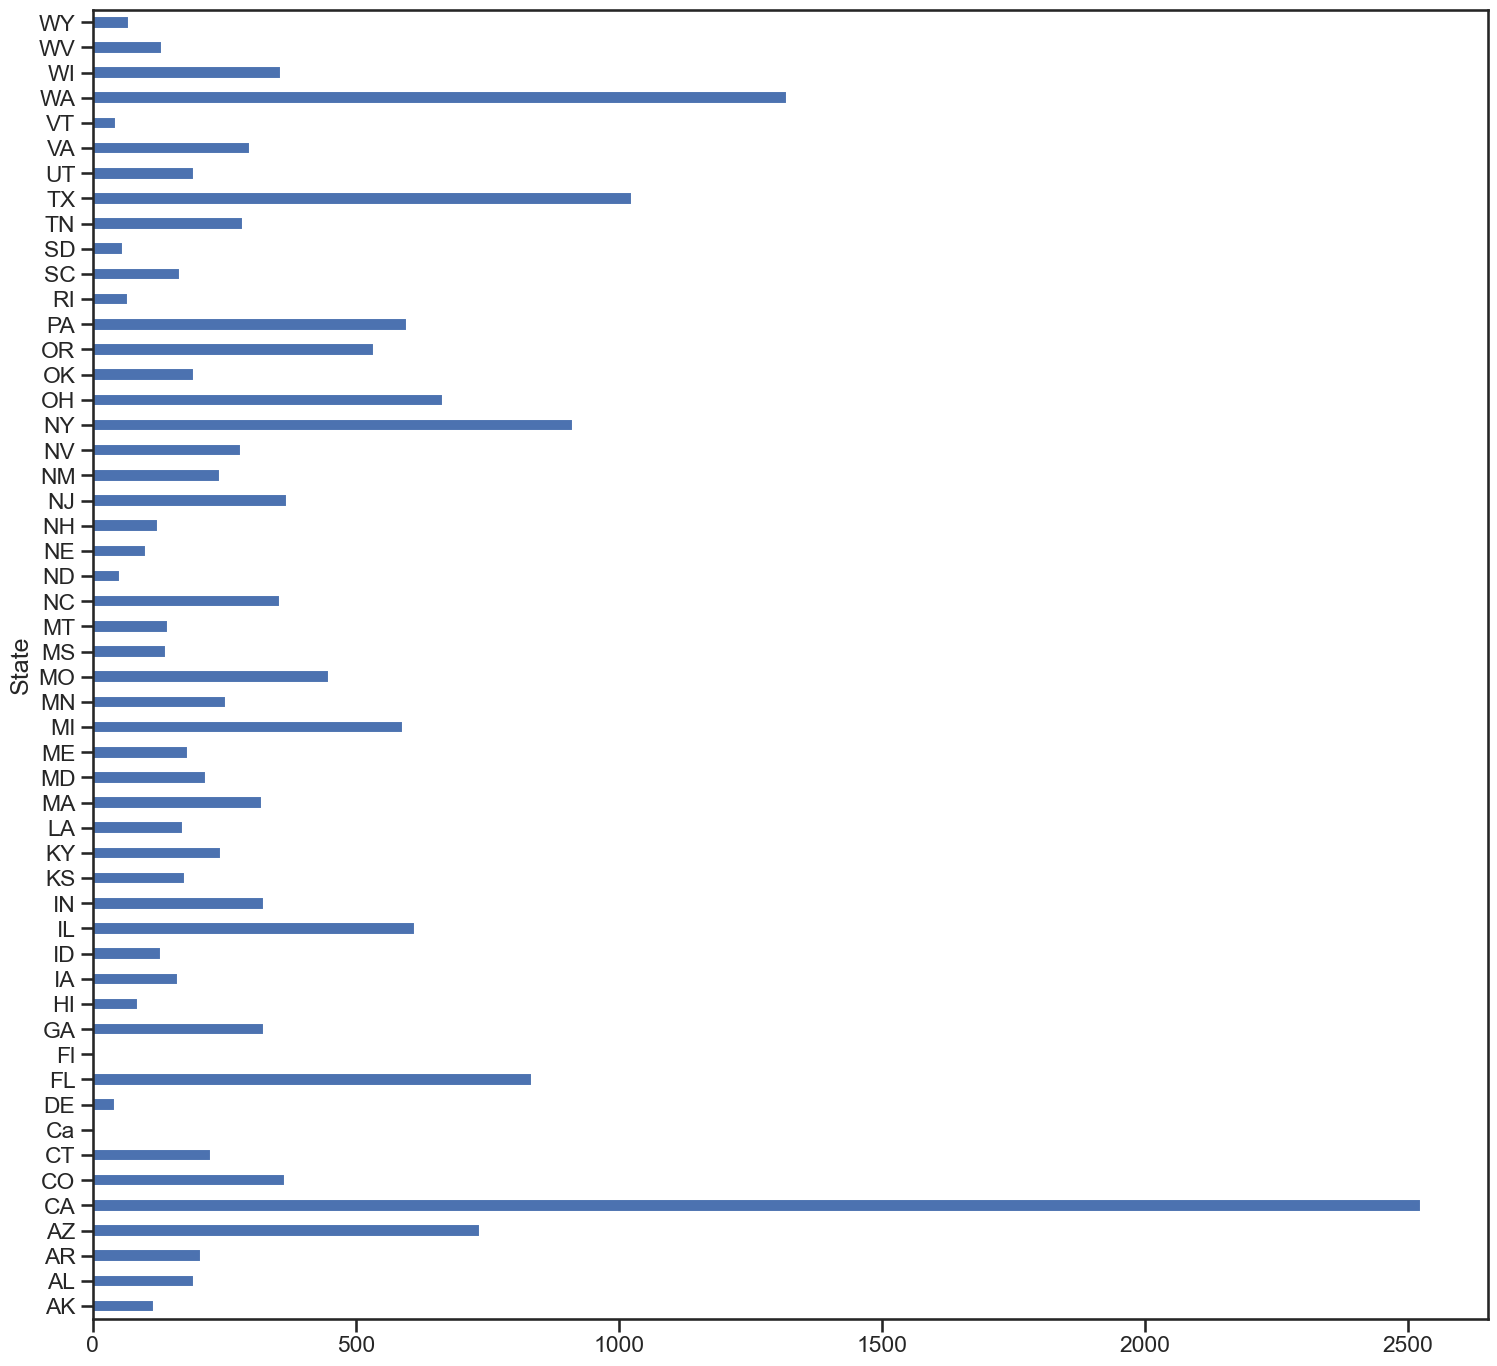

In [164]:
df6['City'].plot(kind='barh', 
                 figsize=(18,17));

## <font color="blue">Population Data</font>

### Using the `groupby` Function and Related Functions to Aggregate

Read data from url as pandas dataframe:

In [ ]:
pop_url = 'http://bit.ly/2cLzoxH'

pop_data = pd.read_csv(pop_url)
pop_data

Convert the `year` values as datetime objects and make the `year` as index:

In [ ]:
pop_data['year'] = pd.to_datetime(pop_data.year, format="%Y")
pop_data.rename(columns={'year':'Year'}, inplace=True)
pop_data = pop_data.set_index(['Year'])
pop_data

We want to create a new dataframe by selecting the `continent` and `pop` columns only:

In [ ]:
continent_pop = pop_data[['continent', 'pop']]
continent_pop

### Pandas `groupby()` Function

- It is used to group rows that have the same values.
- It is used with **aggregate functions** (`count`, `sum`, `min`, `max`, `mean`) to get the statistics based on one or more column values.
- It is also called **Split-Apply-Combine** process:
    - The `groupby()` function splits the data into groups based on some criteria.
    - The aggregate function is applied to each of the groups.
    - The groups are combined together to create a new DataFrame.

In [ ]:
grouped_pop = continent_pop.groupby("continent")
grouped_pop

How could then print the new DataFrame?

In [ ]:
grouped_pop.head()

Obtain statistical description:

In [ ]:
grouped_pop.describe().transpose()

**Iterating through Groups**

In [ ]:
for key, item in grouped_pop:
    print(f"Key is: {str(key)}")
    print(f"{str(item)} \n\n")

#### Selecting a Group

A single group can be selected using `get_group()`:

In [ ]:
grouped_pop.get_group('Oceania')

#### Functions To Aggregate

**`mean()`** computes mean values for each group:

In [ ]:
grouped_pop.aggregate(np.mean)

In [ ]:
grouped_pop.mean()

**`sum()`** adds of values within each group.

In [ ]:
grouped_pop.aggregate(np.sum)

In [ ]:
grouped_pop.sum()

**`size()`** computes the size per each group.

In [ ]:
grouped_pop.aggregate(np.size)

In [ ]:
grouped_pop.size()

For each group, you can similarly use:
    
- `count()`: computes the number of values.
- `max()`: gets maximum value.
- `min()`: gets minimum value.
- `std()`: computes standard deviation of the values.
- `var()`: computes variance, an estimate of variability.
- `sem()`: computes standard error of the mean values.

**Applying several functions at once**

In [ ]:
grouped_pop.agg([np.sum, np.mean, np.std])

**`describe()`** computes a quick summary of values per group

In [ ]:
grouped_pop.describe()

**`first()`** gets the first row value within each group.

In [ ]:
grouped_pop.first()

**`last()`** gets the last row value within each group.

In [ ]:
grouped_pop.last()

**`nth()`** gives nth value, in each group.

In [ ]:
grouped_pop.nth(8)

## <font color="blue">Read HTML Table</font>

We want to be able to read the **United States presidential election results for Minnesota** table from:

[https://en.wikipedia.org/wiki/Minnesota](https://en.wikipedia.org/wiki/Minnesota)


In [3]:
df_table = pd.read_html('https://en.wikipedia.org/wiki/Minnesota')
df_table
#Clearly this is not readable, considering we gave it the entire website

[                                            Minnesota  \
 0                                               State   
 1                                            FlagSeal   
 2   Nicknames: Land of 10,000 Lakes; North Star St...   
 3   Motto: L'Étoile du Nord (French: The Star of t...   
 4                           Anthem: "Hail! Minnesota"   
 5   Map of the United States with Minnesota highli...   
 6                                             Country   
 7                                    Before statehood   
 8                               Admitted to the Union   
 9                                             Capital   
 10                                       Largest city   
 11                       Largest county or equivalent   
 12                      Largest metro and urban areas   
 13                                         Government   
 14                                         • Governor   
 15                              • Lieutenant Governor   
 16           

In [4]:
help(pd.read_html)

Help on function read_html in module pandas.io.html:

read_html(io: 'FilePath | ReadBuffer[str]', *, match: 'str | Pattern' = '.+', flavor: 'HTMLFlavors | Sequence[HTMLFlavors] | None' = None, header: 'int | Sequence[int] | None' = None, index_col: 'int | Sequence[int] | None' = None, skiprows: 'int | Sequence[int] | slice | None' = None, attrs: 'dict[str, str] | None' = None, parse_dates: 'bool' = False, thousands: 'str | None' = ',', encoding: 'str | None' = None, decimal: 'str' = '.', converters: 'dict | None' = None, na_values: 'Iterable[object] | None' = None, keep_default_na: 'bool' = True, displayed_only: 'bool' = True, extract_links: "Literal[None, 'header', 'footer', 'body', 'all']" = None, dtype_backend: 'DtypeBackend | lib.NoDefault' = <no_default>, storage_options: 'StorageOptions' = None) -> 'list[DataFrame]'
    Read HTML tables into a ``list`` of ``DataFrame`` objects.
    
    Parameters
    ----------
    io : str, path object, or file-like object
        String, path 

We read all the tables from the webpage. We can select the specific table we want to read by using the `match` parameter:

In [5]:
#this is matching a specific table in the website into a pandas dataframe using the table title

df_table = pd.read_html('https://en.wikipedia.org/wiki/Minnesota', 
                        match='United States presidential election results for Minnesota')

df_table

[    Year Republican         Democratic         Third party        
     Year        No.       %        No.       %         No.       %
 0   2020    1484065  45.28%    1717077  52.40%       76029   2.32%
 1   2016    1323232  44.93%    1367825  46.44%      254176   8.63%
 2   2012    1320225  44.96%    1546167  52.65%       70169   2.39%
 3   2008    1275409  43.82%    1573354  54.06%       61606   2.12%
 4   2004    1346695  47.61%    1445014  51.09%       36678   1.30%
 5   2000    1109659  45.50%    1168266  47.91%      160760   6.59%
 6   1996     766476  34.96%    1120438  51.10%      305726  13.94%
 7   1992     747841  31.85%    1020997  43.48%      579110  24.66%
 8   1988     962337  45.90%    1109471  52.91%       24982   1.19%
 9   1984    1032603  49.54%    1036364  49.72%       15482   0.74%
 10  1980     873241  42.56%     954174  46.50%      224538  10.94%
 11  1976     819395  42.02%    1070440  54.90%       60096   3.08%
 12  1972     898269  51.58%     802346  46.07% 

In [6]:
type(df_table)

list

You can see that the result is a list containing one DataFrame. We can then extract the DataFrame:

In [7]:
#index 0 is the entire list, so that assigns the dataframe df to the list into a pandas df
df = df_table[0]
df

Year Republican         Democratic         Third party        
    Year        No.       %        No.       %         No.       %
0   2020    1484065  45.28%    1717077  52.40%       76029   2.32%
1   2016    1323232  44.93%    1367825  46.44%      254176   8.63%
2   2012    1320225  44.96%    1546167  52.65%       70169   2.39%
3   2008    1275409  43.82%    1573354  54.06%       61606   2.12%
4   2004    1346695  47.61%    1445014  51.09%       36678   1.30%
5   2000    1109659  45.50%    1168266  47.91%      160760   6.59%
6   1996     766476  34.96%    1120438  51.10%      305726  13.94%
7   1992     747841  31.85%    1020997  43.48%      579110  24.66%
8   1988     962337  45.90%    1109471  52.91%       24982   1.19%
9   1984    1032603  49.54%    1036364  49.72%       15482   0.74%
10  1980     873241  42.56%     954174  46.50%      224538  10.94%
11  1976     819395  42.02%    1070440  54.90%       60096   3.08%
12  1972     898269  51.58%     802346  46.07%       41037   2.36%
13  1968     658643  41.46%     857738  54.00%       72129   4.54%
14  1964     559624  36.00%     991117  63.76%        3721   0.24%
15  1960     757915  49.16%     779933  50.58%        4039   0.26%
16  1956     719302  53.68%     617525  46.08%        3178   0.24%
17  1952     763211  55.33%     608458  44.11%        7814   0.57%
18  1948     483617  39.89%     692966  57.16%       35643   2.94%
19  1944     527416  46.86%     589864  52.41%        8249   0.73%
20  1940     596274  47.66%     644196  51.49%       10718   0.86%
21  1936     350461  31.01%     698811  61.84%       80703   7.14%
22  1932     363959  36.29%     600806  59.91%       38078   3.80%
23  1928     560977  57.77%     396451  40.83%       13548   1.40%
24  1924     420759  51.18%      55913   6.80%      345474  42.02%
25  1920     519421  70.59%     142994  19.43%       73423   9.98%
26  1916     179544  46.35%     179152  46.25%       28668   7.40%
27  1912      64334  19.25%     106426  31.84%      163459  48.91%
28  1908     195843  59.11%     109401  33.02%       26060   7.87%
29  1904     216651  73.98%      55187  18.84%       21022   7.18%
30  1900     190461  60.21%     112901  35.69%       12949   4.09%
31  1896     193503  56.62%     139735  40.89%        8524   2.49%
32  1892     122823  45.96%     100920  37.76%       43495  16.28%
33  1888     142492  54.12%     104385  39.65%       16408   6.23%
34  1884     111685  58.78%      70065  36.87%        8267   4.35%
35  1880      93902  62.28%      53315  35.36%        3553   2.36%
36  1876      72955  58.80%      48587  39.16%        2533   2.04%
37  1872      55708  61.27%      35211  38.73%           0   0.00%
38  1868      43722  60.88%      28096  39.12%           0   0.00%
39  1864      25055  59.06%      17367  40.94%           0   0.00%
40  1860      22069  63.53%      11920  34.31%         748   2.15%

Let us gather basic information on rows and columns:

In [8]:
#This outlines the structure of the table it just read in
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   (Year, Year)        41 non-null     int64 
 1   (Republican, No.)   41 non-null     int64 
 2   (Republican, %)     41 non-null     object
 3   (Democratic, No.)   41 non-null     int64 
 4   (Democratic, %)     41 non-null     object
 5   (Third party, No.)  41 non-null     int64 
 6   (Third party, %)    41 non-null     object
dtypes: int64(4), object(3)
memory usage: 2.4+ KB


In [9]:
#We see there are objects (likely strings) in the table

#### Change the column names

In [11]:
#You can replace the columns with new names in order
new_columns = ['Year', 'GOP_Num', 'GOP_Perc', 
               'DNC_Num', 'DNC_Perc', 'Others_Num', 'Others_Perc']
df.columns = new_columns
df

,Year,GOP_Num,GOP_Perc,DNC_Num,DNC_Perc,Others_Num,Others_Perc
0,2020,1484065,45.28%,1717077,52.40%,76029,2.32%
1,2016,1323232,44.93%,1367825,46.44%,254176,8.63%
2,2012,1320225,44.96%,1546167,52.65%,70169,2.39%
3,2008,1275409,43.82%,1573354,54.06%,61606,2.12%
4,2004,1346695,47.61%,1445014,51.09%,36678,1.30%
5,2000,1109659,45.50%,1168266,47.91%,160760,6.59%
6,1996,766476,34.96%,1120438,51.10%,305726,13.94%
7,1992,747841,31.85%,1020997,43.48%,579110,24.66%
8,1988,962337,45.90%,1109471,52.91%,24982,1.19%
9,1984,1032603,49.54%,1036364,49.72%,15482,0.74%


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Year         41 non-null     int64 
 1   GOP_Num      41 non-null     int64 
 2   GOP_Perc     41 non-null     object
 3   DNC_Num      41 non-null     int64 
 4   DNC_Perc     41 non-null     object
 5   Others_Num   41 non-null     int64 
 6   Others_Perc  41 non-null     object
dtypes: int64(4), object(3)
memory usage: 2.4+ KB


- Notice that the columns `GOP_Perc`, `DNC_Perc` and `Others_Perc` more likely have the string type. 
- We want them to have numerical values.
- We can use the `regex=True` parameter to replace the string `%` with an empty space.

In [13]:
df = df.replace({'%': ''}, regex=True)
df

,Year,GOP_Num,GOP_Perc,DNC_Num,DNC_Perc,Others_Num,Others_Perc
0,2020,1484065,45.28,1717077,52.40,76029,2.32
1,2016,1323232,44.93,1367825,46.44,254176,8.63
2,2012,1320225,44.96,1546167,52.65,70169,2.39
3,2008,1275409,43.82,1573354,54.06,61606,2.12
4,2004,1346695,47.61,1445014,51.09,36678,1.30
5,2000,1109659,45.50,1168266,47.91,160760,6.59
6,1996,766476,34.96,1120438,51.10,305726,13.94
7,1992,747841,31.85,1020997,43.48,579110,24.66
8,1988,962337,45.90,1109471,52.91,24982,1.19
9,1984,1032603,49.54,1036364,49.72,15482,0.74


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Year         41 non-null     int64 
 1   GOP_Num      41 non-null     int64 
 2   GOP_Perc     41 non-null     object
 3   DNC_Num      41 non-null     int64 
 4   DNC_Perc     41 non-null     object
 5   Others_Num   41 non-null     int64 
 6   Others_Perc  41 non-null     object
dtypes: int64(4), object(3)
memory usage: 2.4+ KB


- The Columns `GOP_Perc`, `DNC_Perc` and `Others_Perc` are still strings.
- We need to convert them into floating point numbers.

In [15]:
df[['GOP_Perc', 'DNC_Perc', 'Others_Perc']] = df[['GOP_Perc', 'DNC_Perc', 'Others_Perc']].apply(pd.to_numeric)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         41 non-null     int64  
 1   GOP_Num      41 non-null     int64  
 2   GOP_Perc     41 non-null     float64
 3   DNC_Num      41 non-null     int64  
 4   DNC_Perc     41 non-null     float64
 5   Others_Num   41 non-null     int64  
 6   Others_Perc  41 non-null     float64
dtypes: float64(3), int64(4)
memory usage: 2.4 KB


#### Compute the means

In [16]:
df['GOP_Num'].mean()

560287.1463414634

In [17]:
df['DNC_Num'].mean()

604423.731707317

#### Do timeseries plot

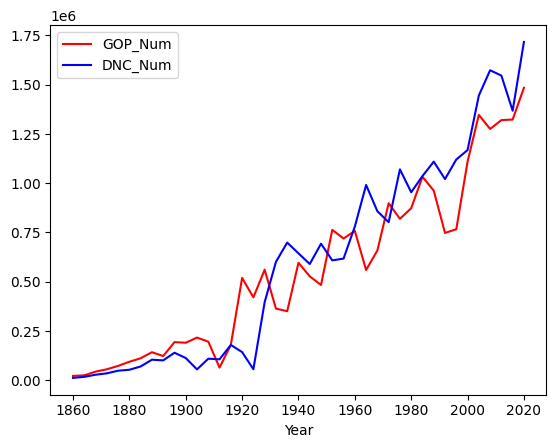

In [23]:
#plt.style.use('seaborn-whitegrid')
df.plot.line(x='Year', y=['GOP_Num', 'DNC_Num'], 
                       color=['red', 'blue']);

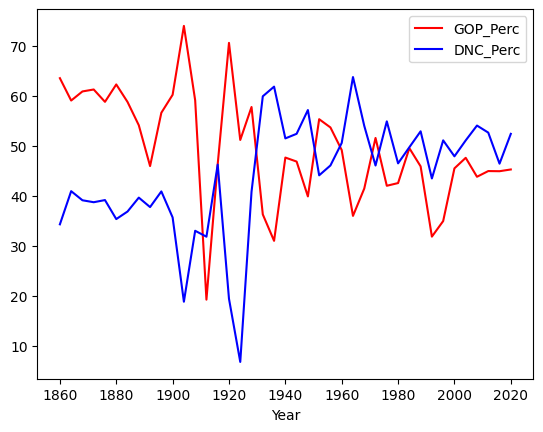

In [25]:
#plt.style.use('seaborn-whitegrid')
df.plot.line(x='Year', y=['GOP_Perc', 'DNC_Perc'], 
                       color=['red', 'blue']);

## <font color="blue">AERONET Observations at Goddard</font>

![fig_aeronet](https://www.nasa.gov/images/content/363322main_bamgomas_maps.jpg)
Image Source: NASA

- [AERONET](https://aeronet.gsfc.nasa.gov/) (AErosol RObotic NETwork) is a globally distributed network of identical robotically controlled ground-based sun/sky scanning radiometers. 
- Each instrument measures the intensity of sun and sky light throughout daylight hours from the ultraviolet through the near-infrared. 
- The program provides a longterm, continuous, and accessible public domain database of aerosol optical, microphysical, and radiative properties for aerosol research including, aerosol characterization, validation of satellite retrievals and model predictions, and synergism with other databases.
- Here are some Science benefits of AERONET:
     - AERONET measurements are used to validate and advance algorithm development of satellite retrievals of aerosols.
     - Aerosol transport models use aerosol data from AERONET to validate and improve model algorithms.
     - Aerosol assimilation models as well as weather prediction models use real time AERONET data to improve predictions.
     - Long-term commitment to AERONET sites worldwide provides assessment of the regional climatological impact of aerosols (e.g., aerosol amount, size, and heating or cooling effects).
- Over 840 stations worldwide.
- Here, we analyze the measurements (Aerosol Optical Depth (AOD)) at the [NASA GSFC](https://aeronet.gsfc.nasa.gov/new_web/photo_db_v3/GSFC.html) site.

In [26]:
url = "https://portal.nccs.nasa.gov/datashare/astg/training/python/pandas/aeronet/"

filename = url+"19930101_20210102_GSFC.lev20"

In [27]:
dateparse = lambda x: datetime.datetime.strptime(x, '%d:%m:%Y %H:%M:%S')
df = pd.read_csv(filename, skiprows=6, na_values=-999,
                 parse_dates={'datetime': [0, 1]}, 
                 date_parser=dateparse, # date_parser=dateparse
                 index_col=0) 
                 #squeeze=True)

In [30]:
df

,Day_of_Year,AOD_1640nm,AOD_1020nm,AOD_870nm,AOD_865nm,AOD_779nm,AOD_675nm,AOD_667nm,AOD_620nm,AOD_560nm,...,N[440-675_Angstrom_Exponent],N[500-870_Angstrom_Exponent],N[340-440_Angstrom_Exponent],N[440-675_Angstrom_Exponent[Polar]],Data_Quality_Level,AERONET_Instrument_Number,AERONET_Site_Name,Site_Latitude(Degrees),Site_Longitude(Degrees),Site_Elevation(m)
datetime,,,,,,,,,,,,,,,,,,,,,
1993-05-14 12:00:00,134,NaN,0.158325,0.178997,NaN,NaN,0.233399,NaN,NaN,NaN,...,3,0,3,0,lev20,9,GSFC,38.9925,-76.839833,87.0
1993-05-15 12:00:00,135,NaN,0.121314,0.138490,NaN,NaN,0.176759,NaN,NaN,NaN,...,48,0,48,0,lev20,2,GSFC,38.9925,-76.839833,87.0
1993-05-26 12:00:00,146,NaN,0.140392,0.170959,NaN,NaN,0.243861,NaN,NaN,NaN,...,9,0,7,0,lev20,2,GSFC,38.9925,-76.839833,87.0
1993-05-27 12:00:00,147,NaN,0.093931,0.108151,NaN,NaN,0.139159,NaN,NaN,NaN,...,19,0,19,0,lev20,2,GSFC,38.9925,-76.839833,87.0
1993-06-16 12:00:00,167,NaN,0.099382,0.107474,NaN,NaN,0.144526,NaN,NaN,NaN,...,12,0,12,0,lev20,2,GSFC,38.9925,-76.839833,87.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-13 12:00:00,257,0.054054,0.079703,0.091395,NaN,NaN,0.114655,NaN,NaN,NaN,...,61,61,61,0,lev20,867,GSFC,38.9925,-76.839833,87.0
2020-09-14 12:00:00,258,0.155274,0.440855,0.587899,NaN,NaN,0.839463,NaN,NaN,NaN,...,50,54,45,0,lev20,867,GSFC,38.9925,-76.839833,87.0
2020-09-15 12:00:00,259,0.149455,0.475609,0.633273,NaN,NaN,0.895112,NaN,NaN,NaN,...,115,123,110,0,lev20,867,GSFC,38.9925,-76.839833,87.0


In [31]:
df.columns

Index(['Day_of_Year', 'AOD_1640nm', 'AOD_1020nm', 'AOD_870nm', 'AOD_865nm',
       'AOD_779nm', 'AOD_675nm', 'AOD_667nm', 'AOD_620nm', 'AOD_560nm',
       'AOD_555nm', 'AOD_551nm', 'AOD_532nm', 'AOD_531nm', 'AOD_510nm',
       'AOD_500nm', 'AOD_490nm', 'AOD_443nm', 'AOD_440nm', 'AOD_412nm',
       'AOD_400nm', 'AOD_380nm', 'AOD_340nm', 'Precipitable_Water(cm)',
       'AOD_681nm', 'AOD_709nm', 'AOD_Empty', 'AOD_Empty.1', 'AOD_Empty.2',
       'AOD_Empty.3', 'AOD_Empty.4', '440-870_Angstrom_Exponent',
       '380-500_Angstrom_Exponent', '440-675_Angstrom_Exponent',
       '500-870_Angstrom_Exponent', '340-440_Angstrom_Exponent',
       '440-675_Angstrom_Exponent[Polar]', 'N[AOD_1640nm]', 'N[AOD_1020nm]',
       'N[AOD_870nm]', 'N[AOD_865nm]', 'N[AOD_779nm]', 'N[AOD_675nm]',
       'N[AOD_667nm]', 'N[AOD_620nm]', 'N[AOD_560nm]', 'N[AOD_555nm]',
       'N[AOD_551nm]', 'N[AOD_532nm]', 'N[AOD_531nm]', 'N[AOD_510nm]',
       'N[AOD_500nm]', 'N[AOD_490nm]', 'N[AOD_443nm]', 'N[AOD_440nm]',
   

In [32]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Day_of_Year,6835.0,183.288222,9.945628e+01,1.000000,101.000000,185.000000,264.000000,366.000000
AOD_1640nm,3098.0,0.028640,2.389996e-02,0.002036,0.013154,0.022177,0.036416,0.296412
AOD_1020nm,6808.0,0.066374,6.764649e-02,0.000495,0.026675,0.045413,0.080424,1.119021
AOD_870nm,6828.0,0.085221,8.871788e-02,0.007140,0.033775,0.057267,0.102186,1.405557
AOD_865nm,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
N[440-675_Angstrom_Exponent[Polar]],6835.0,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
AERONET_Instrument_Number,6835.0,291.269203,3.147870e+02,2.000000,89.000000,101.000000,451.000000,1027.000000
Site_Latitude(Degrees),6835.0,38.992500,5.194447e-12,38.992500,38.992500,38.992500,38.992500,38.992500
Site_Longitude(Degrees),6835.0,-76.839833,9.976750e-12,-76.839833,-76.839833,-76.839833,-76.839833,-76.839833


**Renaming of the Columns of Interest**

In [33]:
old_cols = ['Day_of_Year', 'AOD_675nm', 'AOD_440nm', 
            '440-675_Angstrom_Exponent']

new_cols = ['DoY', 'A675', 'A440', 'Alpha']

In [34]:
df_GSFC = df[old_cols]
df_GSFC.columns = new_cols

In [35]:
df_GSFC

,DoY,A675,A440,Alpha
datetime,,,,
1993-05-14 12:00:00,134,0.233399,0.367211,1.071884
1993-05-15 12:00:00,135,0.176759,0.293171,1.184610
1993-05-26 12:00:00,146,0.243861,0.436805,1.380384
1993-05-27 12:00:00,147,0.139159,0.225286,1.141307
1993-06-16 12:00:00,167,0.144526,0.244953,1.251012
...,...,...,...,...
2020-09-13 12:00:00,257,0.114655,0.169362,0.935218
2020-09-14 12:00:00,258,0.839463,1.077319,0.637442
2020-09-15 12:00:00,259,0.895112,1.086167,0.555824


**Plotting**

<Axes: xlabel='datetime'>

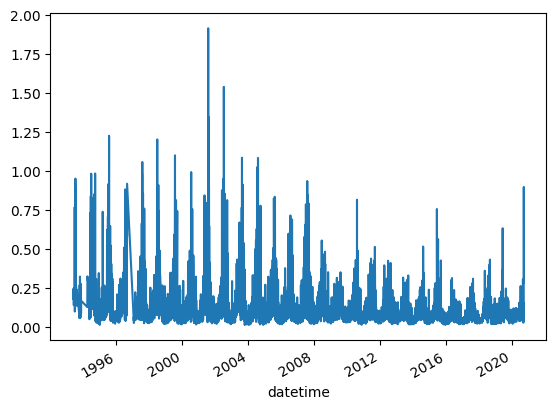

In [36]:
df_GSFC["A675"].plot()

<Axes: xlabel='datetime'>

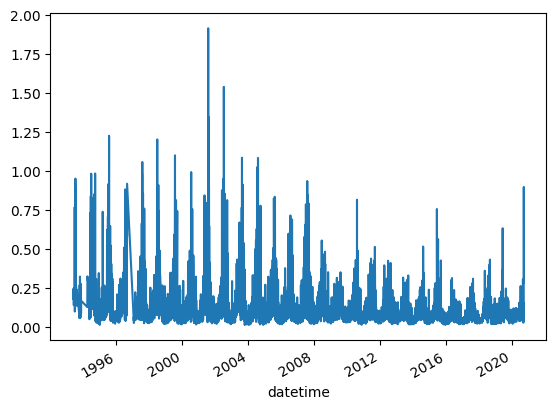

In [37]:
df_GSFC["A675"].plot()

<Axes: xlabel='datetime'>

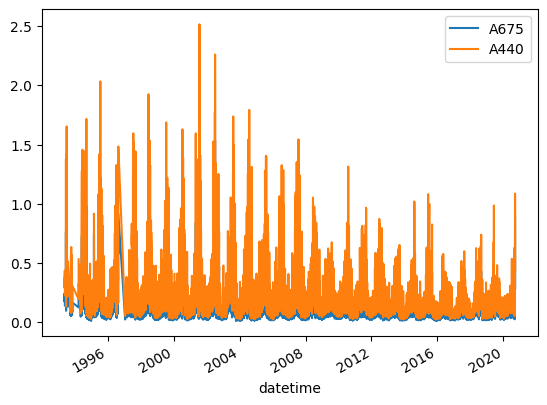

In [38]:
df_GSFC[["A675", "A440"]].plot()

In [39]:
df_GSFC[["A675", "A440"]].plot(subplots='True')

ValueError: When subplots is an iterable, each entry should be a list/tuple of column names.

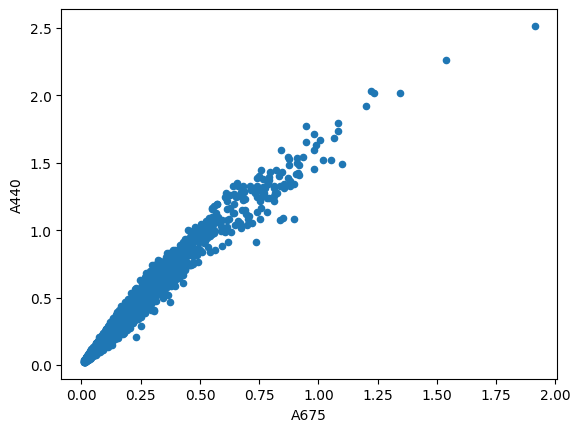

In [40]:
df_GSFC.plot(kind='scatter', x="A675", y="A440");

**Perform Calculations**

We create a new column that is a combination of other columns.

In [ ]:
df_GSFC['A550'] = df_GSFC['A675']*((675.0/550.0))**df_GSFC['Alpha']

In [ ]:
df_GSFC

The above is used to compare model simulation with AERONET observations.

**Zoom in on a Specific Year**

In [ ]:
df_GSFC_2010 = df_GSFC[df_GSFC.index.year == 2010]
df_GSFC_2010

In [ ]:
ax = df_GSFC_2010.plot(x="DoY", y="A550", color="green",
                       title="2010 AERONET at GSFC")
ax.set_xlabel("Day of Year")
ax.set_ylabel("Aerosol Optical Depth")

## <font color="blue">Weather Data</font>

<center>https://www.wunderground.com/cgi-bin/findweather/getForecast?query=KDAA</center>

#### Pandas <font color='red'>read_csv</font>

In [41]:
url = "https://portal.nccs.nasa.gov/datashare/astg/training/python/pandas/weather/"
filename = "hampton_10-10-15_10-10-16.csv"
weather_data = pd.read_csv(url+filename)

Print the data as a table:

In [42]:
weather_data

,EDT,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,MeanDew PointF,Min DewpointF,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityMiles,Mean VisibilityMiles,Min VisibilityMiles,Max Wind SpeedMPH,Mean Wind SpeedMPH,Max Gust SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees
0,2015-10-10,67,64,58,64,57,50,94,78,64,...,10,10,8,24,13,29.0,0.00,7,Rain,15
1,2015-10-11,68,62,54,56,54,51,89,76,64,...,10,10,9,14,11,18.0,0.00,5,NaN,14
2,2015-10-12,74,62,52,62,56,51,96,80,45,...,10,10,9,9,4,NaN,0.00,1,NaN,108
3,2015-10-13,75,69,63,63,61,59,87,75,60,...,10,10,9,20,12,24.0,0.00,1,NaN,211
4,2015-10-14,74,64,56,62,54,50,96,71,46,...,10,10,10,13,7,20.0,0.00,1,NaN,314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,2016-10-6,72,69,66,68,65,61,94,88,80,...,10,10,10,18,14,23.0,0.01,8,Rain,44
363,2016-10-7,79,74,68,70,68,66,94,87,73,...,10,10,10,20,16,26.0,0.00,4,NaN,77
364,2016-10-8,75,70,64,72,68,64,100,96,83,...,10,4,1,37,19,53.0,6.68,6,Rain-Thunderstorm,43
365,2016-10-9,66,61,56,66,59,42,100,86,51,...,10,6,2,39,26,55.0,2.42,7,Rain,8


Print the column labels:

In [43]:
weather_data.columns

Index(['EDT', 'Max TemperatureF', 'Mean TemperatureF', 'Min TemperatureF',
       'Max Dew PointF', 'MeanDew PointF', 'Min DewpointF', 'Max Humidity',
       ' Mean Humidity', ' Min Humidity', ' Max Sea Level PressureIn',
       ' Mean Sea Level PressureIn', ' Min Sea Level PressureIn',
       ' Max VisibilityMiles', ' Mean VisibilityMiles', ' Min VisibilityMiles',
       ' Max Wind SpeedMPH', ' Mean Wind SpeedMPH', ' Max Gust SpeedMPH',
       'PrecipitationIn', ' CloudCover', ' Events', ' WindDirDegrees'],
      dtype='object')

Get basic information on the data:

In [44]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   EDT                         367 non-null    object 
 1   Max TemperatureF            367 non-null    int64  
 2   Mean TemperatureF           367 non-null    int64  
 3   Min TemperatureF            367 non-null    int64  
 4   Max Dew PointF              367 non-null    int64  
 5   MeanDew PointF              367 non-null    int64  
 6   Min DewpointF               367 non-null    int64  
 7   Max Humidity                367 non-null    int64  
 8    Mean Humidity              367 non-null    int64  
 9    Min Humidity               367 non-null    int64  
 10   Max Sea Level PressureIn   367 non-null    float64
 11   Mean Sea Level PressureIn  367 non-null    float64
 12   Min Sea Level PressureIn   367 non-null    float64
 13   Max VisibilityMiles        367 non

Print statistical information:

In [53]:
weather_data.describe()

,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,MeanDew PointF,Min DewpointF,Max Humidity,Mean Humidity,Min Humidity,Max Sea Level PressureIn,...,Min Sea Level PressureIn,Max VisibilityMiles,Mean VisibilityMiles,Min VisibilityMiles,Max Wind SpeedMPH,Mean Wind SpeedMPH,Max Gust SpeedMPH,PrecipitationIn,CloudCover,WindDirDegrees
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,...,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,201.000000,367.000000,367.000000,367.000000
mean,69.811989,61.893733,54.095368,58.525886,53.416894,47.525886,91.594005,76.299728,55.869210,30.159946,...,29.967875,9.991826,8.716621,5.599455,16.673025,8.945504,27.567164,0.144850,3.523161,164.498638
std,15.350373,15.155736,15.708727,15.585434,16.935043,18.855903,9.628695,14.572321,16.542355,0.184286,...,0.206949,0.156599,1.880682,4.001407,6.211826,3.959808,8.368197,0.459854,2.704759,102.382329
min,25.000000,20.000000,15.000000,4.000000,2.000000,-6.000000,51.000000,37.000000,23.000000,29.660000,...,29.260000,7.000000,2.000000,0.000000,6.000000,2.000000,17.000000,0.000000,0.000000,1.000000
25%,59.000000,52.000000,42.000000,48.500000,41.000000,33.000000,87.000000,66.000000,43.500000,30.040000,...,29.860000,10.000000,8.000000,1.000000,13.000000,6.000000,22.000000,0.000000,1.000000,61.500000
50%,72.000000,62.000000,55.000000,62.000000,56.000000,50.000000,94.000000,78.000000,56.000000,30.150000,...,29.980000,10.000000,10.000000,7.000000,16.000000,8.000000,25.000000,0.000000,4.000000,187.000000
75%,82.000000,74.000000,68.000000,72.000000,68.000000,64.000000,100.000000,88.000000,67.000000,30.255000,...,30.100000,10.000000,10.000000,9.000000,20.000000,11.000000,30.000000,0.060000,6.000000,239.500000
max,96.000000,88.000000,80.000000,80.000000,77.000000,76.000000,100.000000,100.000000,94.000000,30.770000,...,30.600000,10.000000,10.000000,10.000000,53.000000,27.000000,75.000000,6.680000,8.000000,359.000000


Access values of a column like in a dictionary:

In [46]:
weather_data["Max TemperatureF"]

0      67
1      68
2      74
3      75
4      74
       ..
362    72
363    79
364    75
365    66
366    57
Name: Max TemperatureF, Length: 367, dtype: int64

In [47]:
weather_data["EDT"]

0      2015-10-10
1      2015-10-11
2      2015-10-12
3      2015-10-13
4      2015-10-14
          ...    
362     2016-10-6
363     2016-10-7
364     2016-10-8
365     2016-10-9
366    2016-10-10
Name: EDT, Length: 367, dtype: object

You can get the column index first and the values:

In [48]:
my_col = weather_data.columns.get_loc("Max TemperatureF")
weather_data.iloc[:,my_col]

0      67
1      68
2      74
3      75
4      74
       ..
362    72
363    79
364    75
365    66
366    57
Name: Max TemperatureF, Length: 367, dtype: int64

You can also use the loc method:

In [49]:
weather_data.loc[:,"Max TemperatureF"]

0      67
1      68
2      74
3      75
4      74
       ..
362    72
363    79
364    75
365    66
366    57
Name: Max TemperatureF, Length: 367, dtype: int64

Access column data like a "method" is nicer because you can autocomplete:

In [54]:
weather_data.EDT  

0      2015-10-10
1      2015-10-11
2      2015-10-12
3      2015-10-13
4      2015-10-14
          ...    
362     2016-10-6
363     2016-10-7
364     2016-10-8
365     2016-10-9
366    2016-10-10
Name: EDT, Length: 367, dtype: object

You can elect multiple columns:

In [55]:
weather_data[["EDT", "Mean TemperatureF"]]

,EDT,Mean TemperatureF
0,2015-10-10,64
1,2015-10-11,62
2,2015-10-12,62
3,2015-10-13,69
4,2015-10-14,64
...,...,...
362,2016-10-6,69
363,2016-10-7,74
364,2016-10-8,70
365,2016-10-9,61


You can also pass an argument:

In [57]:
weather_data.EDT.head() #This just shows the first couple values in a column

0    2015-10-10
1    2015-10-11
2    2015-10-12
3    2015-10-13
4    2015-10-14
Name: EDT, dtype: object

In [58]:
weather_data["Mean TemperatureF"].head()

0    64
1    62
2    62
3    69
4    64
Name: Mean TemperatureF, dtype: int64

#### Rename columns

Assign a new list of column names to the columns property of the DataFrame.

In [59]:
weather_data.columns

Index(['EDT', 'Max TemperatureF', 'Mean TemperatureF', 'Min TemperatureF',
       'Max Dew PointF', 'MeanDew PointF', 'Min DewpointF', 'Max Humidity',
       ' Mean Humidity', ' Min Humidity', ' Max Sea Level PressureIn',
       ' Mean Sea Level PressureIn', ' Min Sea Level PressureIn',
       ' Max VisibilityMiles', ' Mean VisibilityMiles', ' Min VisibilityMiles',
       ' Max Wind SpeedMPH', ' Mean Wind SpeedMPH', ' Max Gust SpeedMPH',
       'PrecipitationIn', ' CloudCover', ' Events', ' WindDirDegrees'],
      dtype='object')

In [60]:
weather_data.columns = ["date", "max_temp", "mean_temp", "min_temp", "max_dew",
                "mean_dew", "min_dew", "max_humidity", "mean_humidity",
                "min_humidity", "max_pressure", "mean_pressure",
                "min_pressure", "max_visibilty", "mean_visibility",
                "min_visibility", "max_wind", "mean_wind", "min_wind",
                "precipitation", "cloud_cover", "events", "wind_dir"]

In [62]:
weather_data.columns

Index(['date', 'max_temp', 'mean_temp', 'min_temp', 'max_dew', 'mean_dew',
       'min_dew', 'max_humidity', 'mean_humidity', 'min_humidity',
       'max_pressure', 'mean_pressure', 'min_pressure', 'max_visibilty',
       'mean_visibility', 'min_visibility', 'max_wind', 'mean_wind',
       'min_wind', 'precipitation', 'cloud_cover', 'events', 'wind_dir'],
      dtype='object')

Now, we can use `.` dot: 

In [63]:
weather_data.mean_temp.head()

0    64
1    62
2    62
3    69
4    64
Name: mean_temp, dtype: int64

In [64]:
weather_data.mean_temp.std()

15.155735770237062

In [65]:
weather_data.mean_temp.mean()

61.89373297002725

### Visualization

(Text(0.5, 0, 'days'), Text(0, 0.5, 'degrees'))

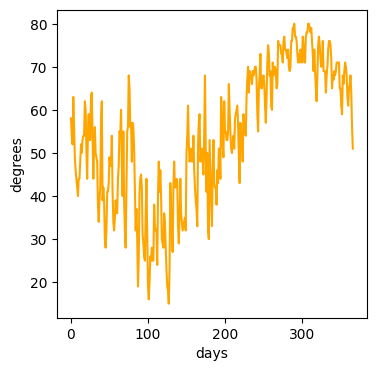

In [102]:
weather_data.min_temp.plot( style = 'orange', label = 'min temp', figsize = (4,4))
plt.xlabel('days'), plt.ylabel('degrees')

<Axes: title={'center': 'mean temperature'}>

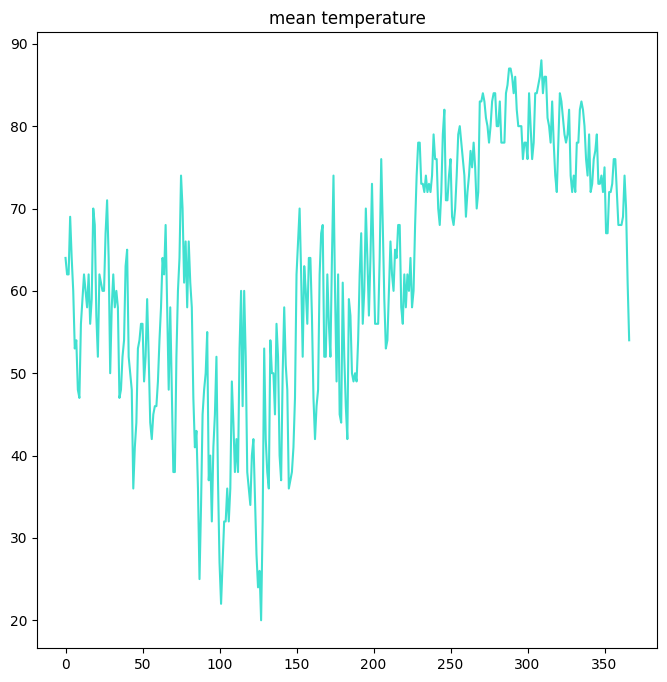

In [95]:
weather_data.mean_temp.plot(title = 'mean temperature', figsize = (8,8), style = 'turquoise')

(Text(0.5, 0, 'days'), Text(0, 0.5, 'degrees'))

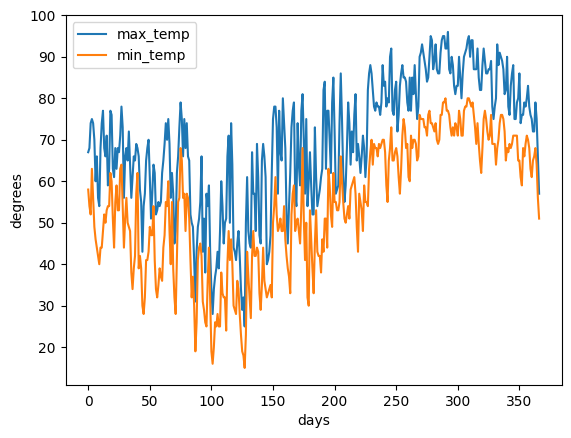

In [83]:
weather_data[['max_temp','min_temp']].plot(subplots=False);
plt.xlabel('days'), plt.ylabel('degrees')

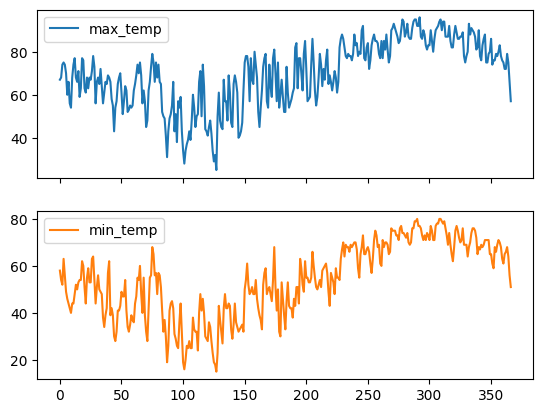

In [84]:
new_weather_data = weather_data[['max_temp','min_temp']]
new_weather_data.plot(subplots=True);

We can specify column labels in the loc method to retrieve columns by label instead of by position:

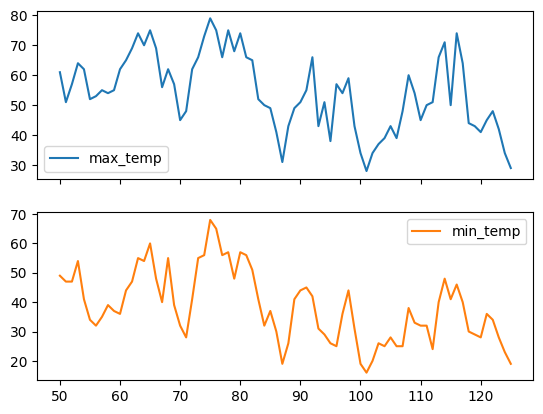

In [85]:
new_weather_data = weather_data.loc[50:125,['max_temp','min_temp']]
new_weather_data.plot(subplots=True);

The <font color='red'>plot()</font> function returns a matplotlib <font color='red'>AxesSubPlot</font> object. You can pass this object into subsequent calls to plot() in order to compose plots.

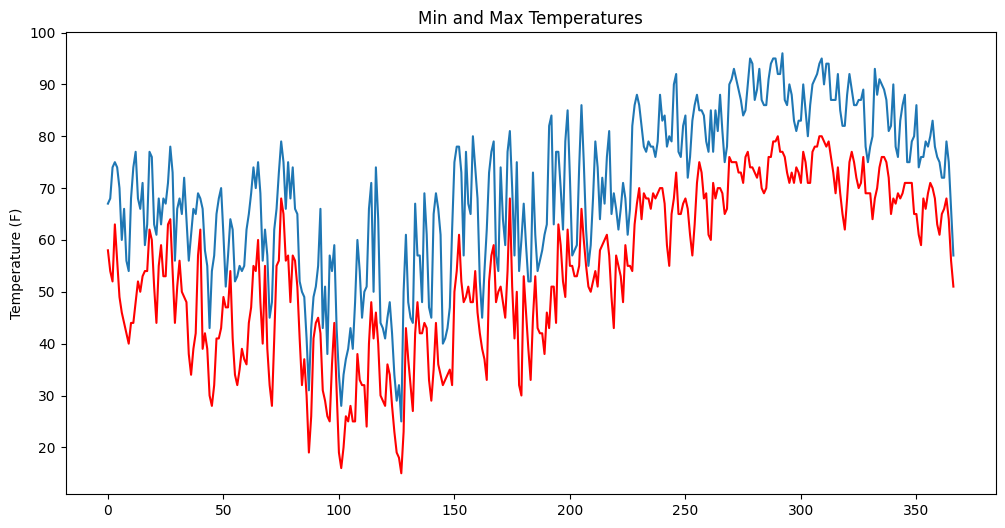

In [96]:
ax = weather_data.max_temp.plot(title="Min and Max Temperatures", 
                                figsize=(12,6));
weather_data.min_temp.plot(style="red", ax=ax);
ax.set_ylabel("Temperature (F)");

Perform scatter plot:

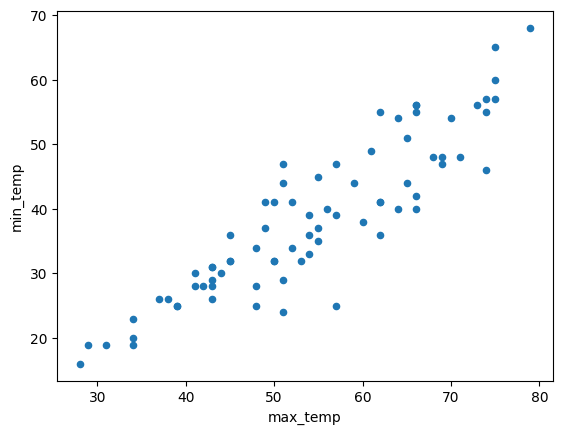

In [97]:
new_weather_data.plot(kind='scatter', x='max_temp', y='min_temp');

### <font color="green"> Breakout 4</font>
* Read the weather data so that the indices are the dates
* Plot the max and min tempatures on the same axes with the dates (ranging from November to March) as x-axis.

<details><summary><b><font color="green">Click here to access the solution</font></b></summary>
<p>

```python
weather_data1 = weather_data

# Make the date (datetime object) as index
weather_data1.set_index("date",inplace=True) 

# Select the date range
df = weather_data1[(weather_data1.index > '2015-11-01') & \
                   (weather_data1.index <= '2016-03-31')]
ax = df.max_temp.plot(title="Min and Max Temperatures", 
                                figsize=(12,6));
df.min_temp.plot(style="red", ax=ax);
ax.set_ylabel("Temperature (F)");
``` 
</p>
</details>

## <font color="blue">Climate data</font>

### <center>Global Surface Temperature Change based on Land and Ocean Data</center>

#### Reference

- [http://pubs.giss.nasa.gov/docs/2010/2010_Hansen_ha00510u.pdf](http://pubs.giss.nasa.gov/docs/2010/2010_Hansen_ha00510u.pdf)
- [https://data.giss.nasa.gov/gistemp/graphs_v4/](https://data.giss.nasa.gov/gistemp/graphs_v4/)

#### Pandas  <font color='red'>read_table</font>

In [103]:
url = "https://data.giss.nasa.gov/gistemp/graphs_v4/graph_data/Global_Mean_Estimates_based_on_Land_and_Ocean_Data/graph.txt"
tsurf = pd.read_table(url)
print(type(tsurf))

<class 'pandas.core.frame.DataFrame'>


In [105]:
print(tsurf.head)

<bound method NDFrame.head of      Land-Ocean Temperature Index (C)
0    --------------------------------
1        Year No_Smoothing  Lowess(5)
2        ----------------------------
3            1880     -0.16     -0.09
4            1881     -0.08     -0.13
..                                ...
142          2019      0.98      0.94
143          2020      1.02      0.95
144          2021      0.85      0.98
145          2022      0.90      1.00
146          2023      1.18      1.02

[147 rows x 1 columns]>


There is only 1 column! Let's reformat the data noting that there is a header and values are separated by any number of spaces.

### Data wrangling

> Data Wrangling is the process of converting and mapping data from its raw form to another format with the purpose of making it more valuable and appropriate for advance tasks such as Data Analytics and Machine Learning.

In [107]:
tsurf = pd.read_table(url, skiprows=5, sep="\s+")
tsurf

,1880,-0.16,-0.09
0,1881,-0.08,-0.13
1,1882,-0.11,-0.16
2,1883,-0.17,-0.20
3,1884,-0.28,-0.24
4,1885,-0.33,-0.26
...,...,...,...
138,2019,0.98,0.94
139,2020,1.02,0.95
140,2021,0.85,0.98
141,2022,0.90,1.00


There are columns but the column names are: 1880, -0.20, -0.13

In [108]:
tsurf = pd.read_table(url, skiprows=5, sep="\s+", \
                      names=["year", "Annual Mean", "Lowess Smoothing"])
tsurf

,year,Annual Mean,Lowess Smoothing
0,1880,-0.16,-0.09
1,1881,-0.08,-0.13
2,1882,-0.11,-0.16
3,1883,-0.17,-0.20
4,1884,-0.28,-0.24
...,...,...,...
139,2019,0.98,0.94
140,2020,1.02,0.95
141,2021,0.85,0.98
142,2022,0.90,1.00


We only have 3 columns, one of which is the year of the record. Let use that as the index using the `index_col` option:

In [112]:
tsurf = pd.read_table(url, skiprows=5, sep="\s+", \
                      names=["year", "Annual Mean", "Lowess Smoothing"], 
                      index_col=0)
tsurf

,Annual Mean,Lowess Smoothing
year,,
1880,-0.16,-0.09
1881,-0.08,-0.13
1882,-0.11,-0.16
1883,-0.17,-0.20
1884,-0.28,-0.24
...,...,...
2019,0.98,0.94
2020,1.02,0.95
2021,0.85,0.98


Furthermore the index is made of dates. Let's make that explicit:

In [113]:
tsurf = pd.read_table(url, skiprows=5, sep="\s+", \
                      names=["year", "Annual Mean", "Lowess Smoothing"], 
                      index_col=0, parse_dates=True)
tsurf

,Annual Mean,Lowess Smoothing
year,,
1880-01-01,-0.16,-0.09
1881-01-01,-0.08,-0.13
1882-01-01,-0.11,-0.16
1883-01-01,-0.17,-0.20
1884-01-01,-0.28,-0.24
...,...,...
2019-01-01,0.98,0.94
2020-01-01,1.02,0.95
2021-01-01,0.85,0.98


### Dealing with missing values

In [114]:
tsurf.tail()

,Annual Mean,Lowess Smoothing
year,,
2019-01-01,0.98,0.94
2020-01-01,1.02,0.95
2021-01-01,0.85,0.98
2022-01-01,0.90,1.00
2023-01-01,1.18,1.02


Convert to missing values to `NaN` values:

In [115]:
#tsurf[tsurf == -999.000] = np.nan
tsurf.tail()

,Annual Mean,Lowess Smoothing
year,,
2019-01-01,0.98,0.94
2020-01-01,1.02,0.95
2021-01-01,0.85,0.98
2022-01-01,0.90,1.00
2023-01-01,1.18,1.02


Remove NaN values:

In [116]:
#tsurf.dropna().tail()

### Visualization

<Axes: xlabel='year'>

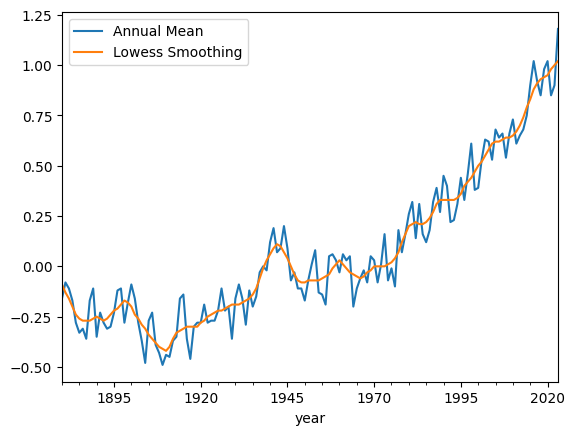

In [117]:
tsurf.plot()

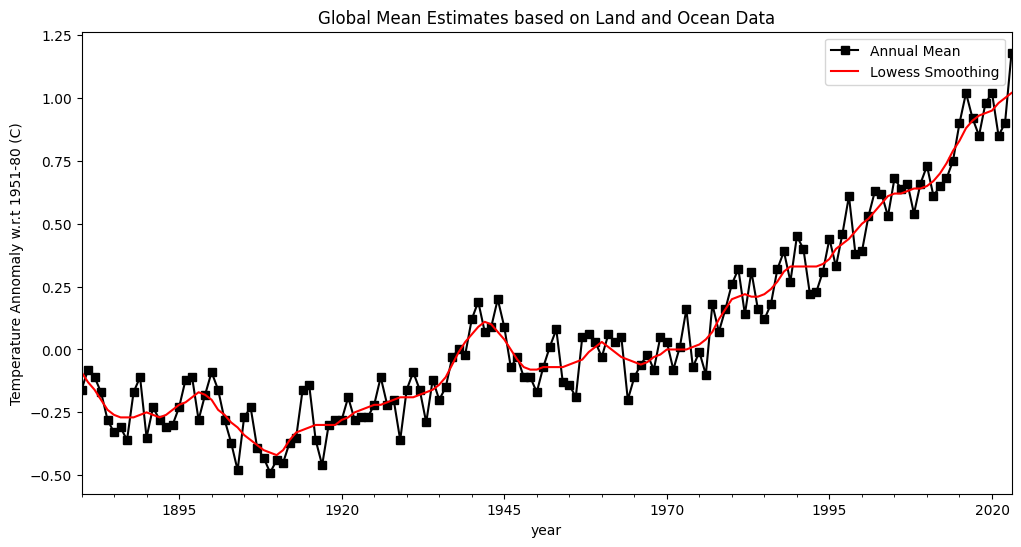

In [136]:
ax = tsurf["Annual Mean"].plot(style="black", 
                               title="Global Mean Estimates based on Land and Ocean Data", 
                                marker='s',
                               figsize=(12,6))
tsurf["Lowess Smoothing"].plot(style="red", ax = ax);
ax.legend()
ax.set_ylabel(f"Temperature Annomaly w.r.t 1951-80 (C)");

In [ ]:
import webbrowser
url = 'https://data.giss.nasa.gov/gistemp/graphs_v4/graph_data/Global_Mean_Estimates_based_on_Land_and_Ocean_Data/graph.html'
webbrowser.open(url)

## <font color="blue">Arctic Oscillation and North Atlantic Oscillation  Datasets</font>

- The <a href="https://en.wikipedia.org/wiki/Arctic_oscillation">Arctic oscillation (AO)</a> or Northern Annular Mode/Northern Hemisphere Annular Mode (NAM) is a weather phenomenon at the Arctic poles north of 20 degrees latitude. It is an important mode of climate variability for the Northern Hemisphere.
- The <a href="https://en.wikipedia.org/wiki/North_Atlantic_oscillation">North Atlantic Oscillation (NAO)</a> is a weather phenomenon in the North Atlantic Ocean of fluctuations in the difference of atmospheric pressure at sea level (SLP) between the Icelandic Low and the Azores High. 

In [ ]:
ao_url = "http://www.cpc.ncep.noaa.gov/products/precip/CWlink/daily_ao_index/monthly.ao.index.b50.current.ascii"
nao_url = "http://www.cpc.ncep.noaa.gov/products/precip/CWlink/pna/norm.nao.monthly.b5001.current.ascii"

Read the North Atlantic Oscillation (NAO) data as a Pandas dataframe by combining Columns 0 & 1 and parsing it as a single date column.

In [ ]:
nao_sr = pd.read_table(nao_url, sep='\s+', 
                       parse_dates={'dates':[0, 1]}, 
                       header=None, index_col=0),#squeeze=True)
nao_sr

Read the Atlantic Oscillation (AO) data as a Pandas dataframe by combining Columns 0 & 1 and parsing it as a single date column.

In [ ]:
ao_sr = pd.read_table(ao_url, sep='\s+', 
                      parse_dates={'dates':[0, 1]}, 
                      header=None, index_col=0)#, squeeze=True)
ao_sr

Create a Pandas DataFrame by combining the two Pandas Series. 

In [ ]:
aonao_df = pd.concat([ao_sr, nao_sr], axis=1)
aonao_df.columns = ['AO', 'NAO']
aonao_df

In [ ]:
#aonao_df = pd.DataFrame(dict(AO = ao_sr, NAO = nao_sr))
#aonao_df

In [ ]:
aonao_df.NAO.plot();

In [ ]:
aonao_df.NAO['2010':'2019'].plot();

In [ ]:
aonao_df.NAO['2010-02':'2010-11'].plot();

In [ ]:
aonao_df.plot(subplots=True);

In [ ]:
aonao_df.loc[(aonao_df.AO > 0) & (aonao_df.NAO < 0) 
                               & (aonao_df.index > '2010-01') 
                               & (aonao_df.index < '2020-01'), 'NAO'].plot(kind='barh');

#### Adding a new column

In [ ]:
aonao_df['Diff'] = aonao_df['AO']-aonao_df['NAO']
aonao_df

#### Resampling

- Pandas provide easy way to resample data to different time frequency. 
- Two main parameters for resampling:
     1. Time period you resample to 
     2. The method that you use. By default the method is mean. 
     
In the example below we calculate the annual mean ("A").

In [ ]:
aonao_df_mm = aonao_df.resample("A").mean()
aonao_df_mm

In [ ]:
aonao_df_mm.plot(style='g--', subplots=True);

In [ ]:
aonao_df_mm = aonao_df.resample("A").median()
aonao_df_mm.plot(style='g--', subplots=True);

You can use your methods for resampling, for example `np.max` (in this case we change resampling frequency to 3 years):

In [ ]:
aonao_df_mm = aonao_df.resample("3A").apply(np.max)
aonao_df_mm.plot(style='g--', subplots=True);

You can specify several functions at once as a list:

In [ ]:
aonao_df_mm = aonao_df.NAO.resample("A").apply(['mean', np.min, np.max])
aonao_df_mm['1900':'2020'].plot(subplots=True);

#### Group By

Process that involves one or more of the steps:

- Splitting the data into groups based on some criteria.
- Applying a function to each group independently.
- Combining the results into a data structure.

Group by year:

In [ ]:
aonao_df_gb_year = aonao_df.groupby(by=[aonao_df.index.year]).mean()
aonao_df_gb_year

In [ ]:
aonao_df.groupby(pd.Grouper(freq='A')).mean()

In [ ]:
aonao_df_gb_year.plot()

Group by month:

In [ ]:
aonao_df_gb_month = aonao_df.groupby(by=[aonao_df.index.month]).mean()
aonao_df_gb_month

In [ ]:
aonao_df.groupby(pd.Grouper(freq='M')).mean()

In [ ]:
aonao_df_gb_month.shape

In [ ]:
aonao_df_gb_month.plot(subplots=True);

In [ ]:
aonao_df.groupby(by=[aonao_df.index.month]).std().shape

In [ ]:
aonao_df.groupby(by=[aonao_df.index.month]).std().plot(subplots=True);

Quarterly Data:

In [ ]:
aonao_df.groupby(pd.Grouper(freq='Q')).mean()

In [ ]:
aonao_df.groupby(pd.Grouper(freq='Q')).mean().plot(subplots=True);

## <font color="blue">Web Scraping Sea Level Data</font>

The [Permanent Service for Mean Sea Level](http://www.psmsl.org/) (PSMSL) website contains Mean Sea Level (MSL) data from stations around the world. Here we download and parse all tables in a webpage, and again we just give `read_html` the URL to parse:

#### Pandas  <font color='red'>read_html</font>

In [ ]:
# Needs `lxml`, `beautifulSoup4` and `html5lib` python packages
table_list = pd.read_html("http://www.psmsl.org/data/obtaining/")

In [ ]:
type(table_list)

In [ ]:
len(table_list)

In [ ]:
table_list[-1]

There is 1 table on that page which contains metadata about the stations where sea levels are recorded:

In [ ]:
local_sea_level_stations = table_list[0]
local_sea_level_stations

That table can be used to search for a station in a region of the world we choose, extract an ID for it and download the corresponding time series with the URL:

```python
http://www.psmsl.org/data/obtaining/met.monthly.data/< ID >.metdata
```

The datasets that we obtain straight from the reading functions are pretty raw. A lot of pre-processing can be done during data read but we haven't used all the power of the reading functions. 

The columns of the local_sea_level_stations aren't clean. they contain spaces and dots.

In [ ]:
local_sea_level_stations.columns

We can clean up by removing the `.` and any white space from column name:

In [ ]:
local_sea_level_stations.columns = [name.strip().replace(".", "") 
                                    for name in local_sea_level_stations.columns]
local_sea_level_stations.columns

In [ ]:
local_sea_level_stations.columns = [name.strip().replace(" ", "_") 
                                    for name in local_sea_level_stations.columns]
local_sea_level_stations.columns

Let us only consider the latitude, longitude, country and date:

In [ ]:
selected_columns = ['ID', 'Lat', 'Lon', 'Country', 'Date']
msl_data = local_sea_level_stations[selected_columns]
msl_data

We can now plot locations of the stations on a map:

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

fig = plt.figure(figsize=(12, 9))
map_projection = ccrs.PlateCarree()
data_transform = ccrs.PlateCarree()

ax = plt.axes(projection=map_projection)
ax.stock_img()

# Plot the selected location 
plt.plot(msl_data.Lon, msl_data.Lat, 'r*', 
         transform=data_transform, color="purple", markersize=2)

ax.set(title="Location of the Lat/Lon of MSL stations")

Change the `Date` as datetime object and move it as index:

In [ ]:
msl_data['Date'] = pd.to_datetime(msl_data.Date, format="%d/%m/%Y")
msl_data = msl_data.set_index(['Date'])
msl_data

We can now group the measurements by country:

In [ ]:
grp_msl_data = msl_data.groupby("Country")
grp_msl_data

In [ ]:
num_stations = 0
for key, item in grp_msl_data:
    print("Country: {} -- {:>4} Stations".format(key, len(item)))
    num_stations += len(item)
    #print("{}".format(item))
    #print()
    
print("{} stations in total.".format(num_stations))

Select data for USA:

In [ ]:
msl_usa = grp_msl_data.get_group('USA')
msl_usa

In [ ]:
stationID = msl_usa.ID[-1]

In [ ]:
from datetime import datetime, timedelta

def convert_to_datetime(year_dec):
    year_int = int(float(year_dec))
    base = datetime(year_int, 1, 1)
    rem = float(year_dec) - year_int
    result = base + \
             timedelta(seconds=(base.replace(year=base.year + 1) - base).total_seconds() * rem)
    #print(result.strftime("%Y-%m-%d"))
    return result

x = 1985.2917
convert_to_datetime(x).strftime("%Y-%m-%d") 

In [ ]:
url = f"https://www.psmsl.org/data/obtaining/met.monthly.data/{stationID}.rlrdata"
print(url)
monthly_data = pd.read_csv(url, sep=";", 
                           names=["monthly_mean_sl"],
                          parse_dates={'Dates': [0]}, 
                          date_parser=convert_to_datetime,
                           infer_datetime_format=True,
                          na_values=-99999, header=None, 
                          index_col=0, squeeze=True)

annual_data

##  <font color="blue">Global Temperature Climatology</font>

Let's load a different file with temperature data. NASA's GISS dataset is written in chunks: look at it in `data/temperatures/GLB.Ts+dSST.txt`

In [ ]:
#!head data/temperatures/GLB.Ts+dSST.txt

In [ ]:
url = "https://raw.githubusercontent.com/astg606/py_materials/master/pandas/data/temperatures/"

giss_temp = pd.read_csv(url+"GLB.Ts+dSST.txt", 
                        skiprows=7, 
                        skipfooter=11, 
                        sep="\s+")
print(type(giss_temp))
giss_temp

In [ ]:
# Internal nature of the object
print(giss_temp.shape)
print(giss_temp.dtypes)

Descriptors for the vertical axis (axis=0)

In [ ]:
print(giss_temp.index)

Descriptors for the horizontal axis (axis=1)

In [ ]:
giss_temp.columns

#### Recall: every column is a Series

A lot of information at once including memory usage:

In [ ]:
giss_temp.info()

### Setting the index

In [ ]:
# We didn't set a column number of the index of giss_temp, 
# we can do that after we have read the data:
giss_temp = giss_temp.set_index("Year")
giss_temp.head()

Note Year.1 column is redundant

### Dropping rows and columns

In [ ]:
giss_temp.columns

In [ ]:
# Let's drop it:
giss_temp = giss_temp.drop("Year.1", axis=1) # axis=1 is the data axis
giss_temp

In [ ]:
# We can also just select the columns we want to keep 
# (another way to drop columns)
giss_temp = giss_temp[[u'Jan', u'Feb', u'Mar', u'Apr', 
                       u'May', u'Jun', u'Jul', u'Aug', 
                       u'Sep', u'Oct', u'Nov', u'Dec']]
# Note how we passed a List of column names

giss_temp

In [ ]:
# Let's remove the last row (Year  Jan ...).
giss_temp = giss_temp.drop("Year")  # by  default drop() works on index axis (axis=0)
giss_temp

Let's also set `****` to a real missing value (`np.nan`). We can often do it using a boolean mask, but that may trigger pandas warning. Another way to assign based on a boolean condition is to use the `where` method:

In [ ]:
#giss_temp[giss_temp == "****"] = np.nan # WARNING due to memory layout

# use .where: replace the entries which do not satistfy the condition
giss_temp = giss_temp.where(giss_temp != "****", other=np.nan)

In [ ]:
giss_temp.tail()

Because of the labels (strings) found in the middle of the timeseries, every column only assumed to contain strings (didn't convert them to floating point values):

In [ ]:
giss_temp.dtypes

That can be changed after the fact (and after the cleanup) with the `astype` method of a `Series`:

In [ ]:
giss_temp["Jan"].astype("float32")

In [ ]:
# Loop over all columns that had 'Object' type and make them 'float32'
for col in giss_temp.columns:
    giss_temp[col] = giss_temp[col].astype(np.float32)

An index has a `dtype` just like any Series and that can be changed after the fact too.

In [ ]:
giss_temp.index.dtype

For now, let's change it to an integer so that values can at least be compared properly.

In [ ]:
giss_temp.index = giss_temp.index.astype(np.int32)

### Removing missing values

In [ ]:
# This will remove any year that has a missing value. 
# Use how='all' to keep partial years
giss_temp.dropna(how="all").tail()

In [ ]:
# Replace (fill) NaN with 0 (or some other value, like -999)
giss_temp.fillna(value=0).tail()

In [ ]:
# ffill = forward fill: This fills them with the previous year.
giss_temp.fillna(method="ffill").tail()

There is also a `.interpolate` method that works on a `Series`:

In [ ]:
giss_temp.Aug.interpolate().tail()

For now, we will leave the missing values in all our datasets, because it wouldn't be meaningful to fill them.

### Visualization

In [ ]:
giss_temp.Jan.plot(figsize=LARGE_FIGSIZE);

In [ ]:
# A boxplot
giss_temp.boxplot();

## <font color="purple">Going Deeper: Storing our Work</font>

For each `read_**` function to load data, there is a `to_**` method attached to Series and DataFrames.

Another file format that is commonly used is Excel.

Multiple datasets can be stored in 1 file.

In [ ]:
writer = pd.ExcelWriter("test.xls")

In [1]:
giss_temp.to_excel(writer, sheet_name="GISS temp data")
tsurf.to_excel(writer, sheet_name="NASA sst anom data")

NameError: name 'giss_temp' is not defined

In [ ]:
writer.close()

Another, more powerful file format to store binary data, which allows us to store both `Series` and `DataFrame`s without having to cast anybody is HDF5.

In [ ]:
with pd.HDFStore("all_data.h5") as writer:
    giss_temp.to_hdf(writer, "/temperatures/giss")
    tsurf.to_hdf(writer, "/temperatures/anomalies")
    mean_sea_level.to_hdf(writer, "/sea_level/mean_sea_level")
    local_sea_level_stations.to_hdf(writer, "/sea_level/stations")

In [ ]:
%ls